# <span style="color:Blue">Assignment 2 - Linear Models

## Abstract
The goal of this project is to predict Cancer Mortality Rates for US Counties using multiple regression algorithms. To predict the Cancer Mortality Rates first we we will find the predictors (i.e _indipendant variables_) with strong relation to our target variable '_TARGET_deathRate_'. To achieve better results we will be cleaning data by removing extream outliers and normalizing it. We will be using varios regression algorithms like linear Regression, Logistic regression, StepWise Regression and regularization using either Ridge regression (i.e _L2 regularization_) or Lasso regression (i.e _L1 regularization_). To make prediction more accurate we will create multiple models and compare the accuracy/outputs of models to get better predictions. Further we will be cross validating output of each model using varios methods like K-Fold, cross_val_score from sklearn.

### Data Dictionary
***TARGET_deathRate*** : Dependent variable. Mean per capita (100,000) cancer mortalities(a) <br />
***avgAnnCount*** : Mean number of reported cases of cancer diagnosed annually(a) <br />
***avgDeathsPerYear*** : Mean number of reported mortalities due to cancer(a) <br />
***incidenceRate*** : Mean per capita (100,000) cancer diagoses(a) <br />
***medianIncome*** : Median income per county (b) <br />
***popEst2015*** : Population of county (b) <br />
***povertyPercent*** : Percent of populace in poverty (b) <br />
***studyPerCap*** : Per capita number of cancer-related clinical trials per county (a) <br />
***binnedInc*** : Median income per capita binned by decile (b) <br />
***MedianAge*** : Median age of county residents (b) <br />
***MedianAgeMale*** : Median age of male county residents (b) <br />
***MedianAgeFemale*** : Median age of female county residents (b) <br />
***Geography*** : County name (b) <br />
***AvgHouseholdSize*** : Mean household size of county (b) <br />
***PercentMarried*** : Percent of county residents who are married (b) <br />
***PctNoHS18_24*** : Percent of county residents ages 18-24 highest education attained: less than high school (b) <br />
***PctHS18_24*** : Percent of county residents ages 18-24 highest education attained: high school diploma (b) <br />
***PctSomeCol18_24*** : Percent of county residents ages 18-24 highest education attained: some college (b) <br />
***PctBachDeg18_24*** : Percent of county residents ages 18-24 highest education attained: bachelor's degree (b) <br />
***PctHS25_Over*** : Percent of county residents ages 25 and over highest education attained: high school diploma (b) <br />
***PctBachDeg25_Over*** : Percent of county residents ages 25 and over highest education attained: bachelor's degree (b) <br />
***PctEmployed16_Over*** : Percent of county residents ages 16 and over employed (b) <br />
***PctUnemployed16_Over*** : Percent of county residents ages 16 and over unemployed (b) <br />
***PctPrivateCoverage*** : Percent of county residents with private health coverage (b) <br />
***PctPrivateCoverageAlone*** : Percent of county residents with private health coverage alone (no public assistance) (b) <br />
***PctEmpPrivCoverage*** : Percent of county residents with employee-provided private health coverage (b) <br />
***PctPublicCoverage*** : Percent of county residents with government-provided health coverage (b) <br />
***PctPubliceCoverageAlone*** : Percent of county residents with government-provided health coverage alone (b) <br />
***PctWhite*** : Percent of county residents who identify as White (b) <br />
***PctBlack*** : Percent of county residents who identify as Black (b) <br />
***PctAsian*** : Percent of county residents who identify as Asian (b) <br />
***PctOtherRace*** : Percent of county residents who identify in a category which is not White, Black, or Asian (b) <br />
***PctMarriedHouseholds*** : Percent of married households (b) <br />
***BirthRate*** : Number of live births relative to number of women in county (b) <br />

(a): years 2010-2016 <br />
(b): 2013 Census Estimates

## Acknowledgements

The website hosting the data is located at https://data.world/nrippner/ols-regression-challenge. These data were aggregated from a number of sources including the American Community Survey (https://www.census.gov), https://www.clinicaltrials.gov, and https://www.cancer.gov.

#### Lets Start with importing libraries

In [1]:
# importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model, metrics
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression,LogisticRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, normalize, StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

import pylab as pl

import warnings
warnings.filterwarnings('ignore')
# import re
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error

In [2]:
#Reading Data
df=pd.read_csv(r'cancer_reg.csv', encoding='latin-1')
# df=pd.read_csv(r'C://Users//kaila//OneDrive//Desktop//DSMT//Assignment_2_Linear Models//cancer_reg.csv', encoding='latin-1')

In [3]:
df.head(10)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
5,428.0,152,176.0,505.4,52313,61023,15.6,180.259902,"(51046.4, 54545.6]",45.4,...,38.8,32.6,43.2,20.2,84.882631,1.653205,1.538057,3.314635,51.220360,4.964476
6,250.0,97,175.9,461.8,37782,41516,23.2,0.000000,"(37413.8, 40362.7]",42.6,...,35.0,28.3,46.4,28.7,75.106455,0.616955,0.866157,8.356721,51.013900,4.204317
7,146.0,71,183.6,404.0,40189,20848,17.8,0.000000,"(37413.8, 40362.7]",51.7,...,33.1,25.9,50.9,24.1,89.406636,0.305159,1.889077,2.286268,48.967033,5.889179
8,88.0,36,190.5,459.4,42579,13088,22.3,0.000000,"(40362.7, 42724.4]",49.3,...,37.8,29.9,48.1,26.6,91.787477,0.185071,0.208205,0.616903,53.446998,5.587583
9,4025.0,1380,177.8,510.9,60397,843954,13.1,427.748432,"(54545.6, 61494.5]",35.8,...,NaN,44.4,31.4,16.5,74.729668,6.710854,6.041472,2.699184,50.063573,5.533430


In [4]:
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [5]:
df.shape

(3047, 34)

In [6]:
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

Columns PctSomeCol18_24, PctEmployed16_Over and PctPrivateCoverageAlone have some null value.<br />

In [7]:
df.loc[(df['MedianAge'] > 0) & (df['MedianAge'] <= 40), 'MedianAge'] = int(1)
df.loc[(df['MedianAge'] > 40) & (df['MedianAge'] <= 50), 'MedianAge'] = int(2)
df.loc[(df['MedianAge'] > 50), 'MedianAge'] = int(3)
df['MedianAge']=df['MedianAge'].round(0).astype(int)

df['MedianAge'].value_counts()

2    1621
1    1270
3     156
Name: MedianAge, dtype: int64

Changed MedianAge column to categorical column.

    | MedianAge | Categorical Value   | Occurence  |
    |-----------|---------------------|------------|
    | 0 to 40   | 1                   | 1270       |
    | 40 to 50  | 2                   | 1621       |
    | Above 50  | 3                   | 156        |

Converted all values to integer type to make computation easier.

In [8]:
df['povertyPercent'].describe()

count    3047.000000
mean       16.878175
std         6.409087
min         3.200000
25%        12.150000
50%        15.900000
75%        20.400000
max        47.400000
Name: povertyPercent, dtype: float64

In [9]:
df['isPoor'] = np.where(df['povertyPercent'] <= 15.90, 0 ,1)
df['isPoor'].value_counts()
# remove column povertyPercent;

0    1539
1    1508
Name: isPoor, dtype: int64

Poverty percent is impotant factor when estimating death rate in cancer patients. <br />
Creating binary variable that can be used in linear regression is valuable.<br /> 
- Created new binary column isPoor based on povertyPercent. 
- If povertyPercent below mean then value of isPoor is 0 else 1.

In [10]:
df[['PctEmployed16_Over','PctPrivateCoverageAlone','PctSomeCol18_24']].describe()

,PctEmployed16_Over,PctPrivateCoverageAlone,PctSomeCol18_24
count,2895.000000,2438.000000,762.000000
mean,54.152642,48.453774,40.977034
std,8.315064,10.083006,11.115805
min,17.600000,15.700000,7.100000
25%,48.600000,41.000000,34.000000
50%,54.500000,48.700000,40.400000
75%,60.300000,55.600000,46.400000
max,80.100000,78.900000,79.000000


In [11]:
df['PctEmployed16_Over'] = pd.to_numeric(df['PctEmployed16_Over'], errors='coerce').fillna(54.50)
df['PctPrivateCoverageAlone'] = pd.to_numeric(df['PctPrivateCoverageAlone'], errors='coerce').fillna(48.70)
df['PctSomeCol18_24'] = pd.to_numeric(df['PctSomeCol18_24'], errors='coerce').fillna(40.40)

In [12]:
df[['PctEmployed16_Over','PctPrivateCoverageAlone','PctSomeCol18_24']].describe()

,PctEmployed16_Over,PctPrivateCoverageAlone,PctSomeCol18_24
count,3047.000000,3047.000000,3047.000000
mean,54.169970,48.502987,40.544306
std,8.105295,9.019423,5.561696
min,17.600000,15.700000,7.100000
25%,48.900000,43.100000,40.400000
50%,54.500000,48.700000,40.400000
75%,60.000000,53.800000,40.400000
max,80.100000,78.900000,79.000000


We are going to fill null value with either mean or median to avoid skewness <br />
We replace the null value column with median values(50%) <br />
After Replacing values there is very little changes in overall description and thats good sign that our dataset is still close to the original.

### Creating Dummy columns for MedianAge

In [13]:
# create dummy columns
dummies = pd.get_dummies(df.MedianAge, prefix='MedianAge').iloc[:, 0:]
# concate dummy columns with main dataframe df
df = pd.concat([df, dummies], axis=1)
# df=df.drop('MedianAge', axis=1)

In [14]:
# fig, ax = plt.subplots(figsize=(16,6))
# sns.barplot(x='medIncome', y='TARGET_deathRate', data=df.tail(33), palette='Set1')
# ax.set_xlabel(ax.get_xlabel(), labelpad=15)
# ax.set_ylabel(ax.get_ylabel(), labelpad=30)
# ax.xaxis.label.set_fontsize(16)
# ax.yaxis.label.set_fontsize(16)
# plt.xticks(rotation=90)

# # Add title 
# plt.title('TARGET_deathRate per medIncome')
# plt.show()

### MinMaxScaler normalisation

In [15]:
# std_val = df[['TARGET_deathRate','incidenceRate','medIncome','PctHS25_Over','PctEmployed16_Over','povertyPercent','PctUnemployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctPublicCoverage','PctPublicCoverageAlone','MedianAge_1','MedianAge_2','MedianAge_3','isPoor']]

# std_scale = StandardScaler().fit(std_val)
# df_std = std_scale.transform(std_val)
# print(std_scale)
# print(df_std)

In [16]:
from sklearn.preprocessing import MinMaxScaler
minmax_val = df[['TARGET_deathRate','incidenceRate','medIncome','PctHS25_Over','PctEmployed16_Over','povertyPercent','PctUnemployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctPublicCoverage','PctPublicCoverageAlone','MedianAge_1','MedianAge_2','MedianAge_3','isPoor']]
minmax_scale = MinMaxScaler().fit(minmax_val)
print(minmax_scale)
df_minmax = minmax_scale.transform(minmax_val)
print(df_minmax)

MinMaxScaler(copy=True, feature_range=(0, 1))
[[0.34708017 0.2868934  0.38116413 ... 0.         0.         0.        ]
 [0.3352029  0.20912888 0.24745861 ... 0.         0.         1.        ]
 [0.37941274 0.14757359 0.25931356 ... 1.         0.         0.        ]
 ...
 [0.31078852 0.25084469 0.2767513  ... 0.         0.         0.        ]
 [0.38040251 0.25084469 0.27287732 ... 0.         0.         0.        ]
 [0.50775322 0.25084469 0.18013496 ... 0.         0.         0.        ]]


### Remove outliers

## Calculating Z-Score 
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df[['TARGET_deathRate','incidenceRate','medIncome','PctHS25_Over','PctEmployed16_Over','povertyPercent','PctBachDeg25_Over','PctUnemployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctPublicCoverage','PctPublicCoverageAlone','MedianAge_1','MedianAge_2','MedianAge_3']]))
print(z)

In [18]:
# threshold = 3
# print(np.where(z > 3))

In [19]:
# print(z[7][14])

In [20]:
# q1 = df['TARGET_deathRate'].quantile(0.25)
# q3 = df['TARGET_deathRate'].quantile(0.75)

# print (q1,q3)
# iqr = q3 - q1
# lower_bound  = q1 - (1.5  * iqr)
# upper_bound = q3 + (1.5 * iqr)

# out_df=df.loc[(df['TARGET_deathRate'] > lower_bound) & (df['TARGET_deathRate'] < upper_bound)]
# df['TARGET_deathRate']=out_df['TARGET_deathRate']
# sns.boxplot(x=df['TARGET_deathRate'])

In [21]:
def remove_outlier(df, col_name):
    if ((col_name!='binnedInc')&(col_name!='Geography')&(col_name!='PctSomeCol18_24')&(col_name!='MedianAge_1')&(col_name!='MedianAge_2')&(col_name!='MedianAge_3')):
        q1 = df[col_name].quantile(0.10)
        q3 = df[col_name].quantile(0.90)

#         print (q1,q3)
        iqr = q3 - q1
        lower_bound  = q1 - (1.5  * iqr)
        upper_bound = q3 + (1.5 * iqr)

        out_df=df.loc[(df[col_name] > lower_bound) & (df[col_name] < upper_bound)]
        df[col_name] = out_df[col_name]
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce').fillna(df[col_name].mean())
        return out_df

In [22]:
for column in df:
#     remove_outlier(df,df[column].name)
    print(df[column].name) 

avgAnnCount
avgDeathsPerYear
TARGET_deathRate
incidenceRate
medIncome
popEst2015
povertyPercent
studyPerCap
binnedInc
MedianAge
MedianAgeMale
MedianAgeFemale
Geography
AvgHouseholdSize
PercentMarried
PctNoHS18_24
PctHS18_24
PctSomeCol18_24
PctBachDeg18_24
PctHS25_Over
PctBachDeg25_Over
PctEmployed16_Over
PctUnemployed16_Over
PctPrivateCoverage
PctPrivateCoverageAlone
PctEmpPrivCoverage
PctPublicCoverage
PctPublicCoverageAlone
PctWhite
PctBlack
PctAsian
PctOtherRace
PctMarriedHouseholds
BirthRate
isPoor
MedianAge_1
MedianAge_2
MedianAge_3


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 38 columns):
avgAnnCount                3047 non-null float64
avgDeathsPerYear           3047 non-null int64
TARGET_deathRate           3047 non-null float64
incidenceRate              3047 non-null float64
medIncome                  3047 non-null int64
popEst2015                 3047 non-null int64
povertyPercent             3047 non-null float64
studyPerCap                3047 non-null float64
binnedInc                  3047 non-null object
MedianAge                  3047 non-null int32
MedianAgeMale              3047 non-null float64
MedianAgeFemale            3047 non-null float64
Geography                  3047 non-null object
AvgHouseholdSize           3047 non-null float64
PercentMarried             3047 non-null float64
PctNoHS18_24               3047 non-null float64
PctHS18_24                 3047 non-null float64
PctSomeCol18_24            3047 non-null float64
PctBachDeg18_24      

### Is the relationship significant?

In [24]:
df.corr()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,isPoor,MedianAge_1,MedianAge_2,MedianAge_3
avgAnnCount,1.000000,0.939408,-0.143532,0.073553,0.269145,0.926894,-0.135694,0.082071,-0.135953,-0.124969,...,-0.136501,0.031376,0.435071,0.209184,-0.106221,-0.034508,-0.091079,0.143283,-0.125608,-0.036150
avgDeathsPerYear,0.939408,1.000000,-0.090715,0.062690,0.223207,0.977634,-0.066918,0.063488,-0.154282,-0.148487,...,-0.187159,0.084607,0.443074,0.215149,-0.160266,-0.074420,-0.020650,0.161222,-0.139820,-0.044105
TARGET_deathRate,-0.143532,-0.090715,1.000000,0.449432,-0.428615,-0.120073,0.429389,-0.022285,0.003170,-0.021929,...,-0.177400,0.257024,-0.186331,-0.189894,-0.293325,-0.087407,0.382848,-0.043196,0.081690,-0.088312
incidenceRate,0.073553,0.062690,0.449432,1.000000,-0.001036,0.026912,0.009046,0.077283,0.003914,-0.014733,...,-0.014510,0.113489,-0.008123,-0.208748,-0.152176,-0.118181,0.015250,-0.040566,0.075630,-0.080477
medIncome,0.269145,0.223207,-0.428615,-0.001036,1.000000,0.235523,-0.788965,0.044003,-0.138015,-0.091663,...,0.167225,-0.270232,0.425844,0.083635,0.446083,-0.010195,-0.657538,0.137068,-0.110937,-0.055462
popEst2015,0.926894,0.977634,-0.120073,0.026912,0.235523,1.000000,-0.065299,0.055722,-0.176777,-0.176608,...,-0.190095,0.073044,0.464168,0.241468,-0.127979,-0.057740,-0.022876,0.186794,-0.164286,-0.045918
povertyPercent,-0.135694,-0.066918,0.429389,0.009046,-0.788965,-0.065299,1.000000,-0.055652,-0.131562,-0.214001,...,-0.509433,0.511530,-0.157289,0.047096,-0.604953,-0.012283,0.775088,0.132770,-0.109921,-0.048147
studyPerCap,0.082071,0.063488,-0.022285,0.077283,0.044003,0.055722,-0.055652,1.000000,-0.045999,-0.036647,...,0.023291,-0.019761,0.062543,-0.015247,-0.051736,0.010676,-0.053767,0.048839,-0.043210,-0.011426
MedianAge,-0.135953,-0.154282,0.003170,0.003914,-0.138015,-0.176777,-0.131562,-0.045999,1.000000,0.798516,...,0.342998,-0.217391,-0.235328,-0.243598,0.163340,-0.077926,-0.070007,-0.927529,0.674146,0.548622
MedianAgeMale,-0.124969,-0.148487,-0.021929,-0.014733,-0.091663,-0.176608,-0.214001,-0.036647,0.798516,1.000000,...,0.398044,-0.242748,-0.238322,-0.266655,0.222278,-0.104105,-0.145859,-0.742733,0.542440,0.433416


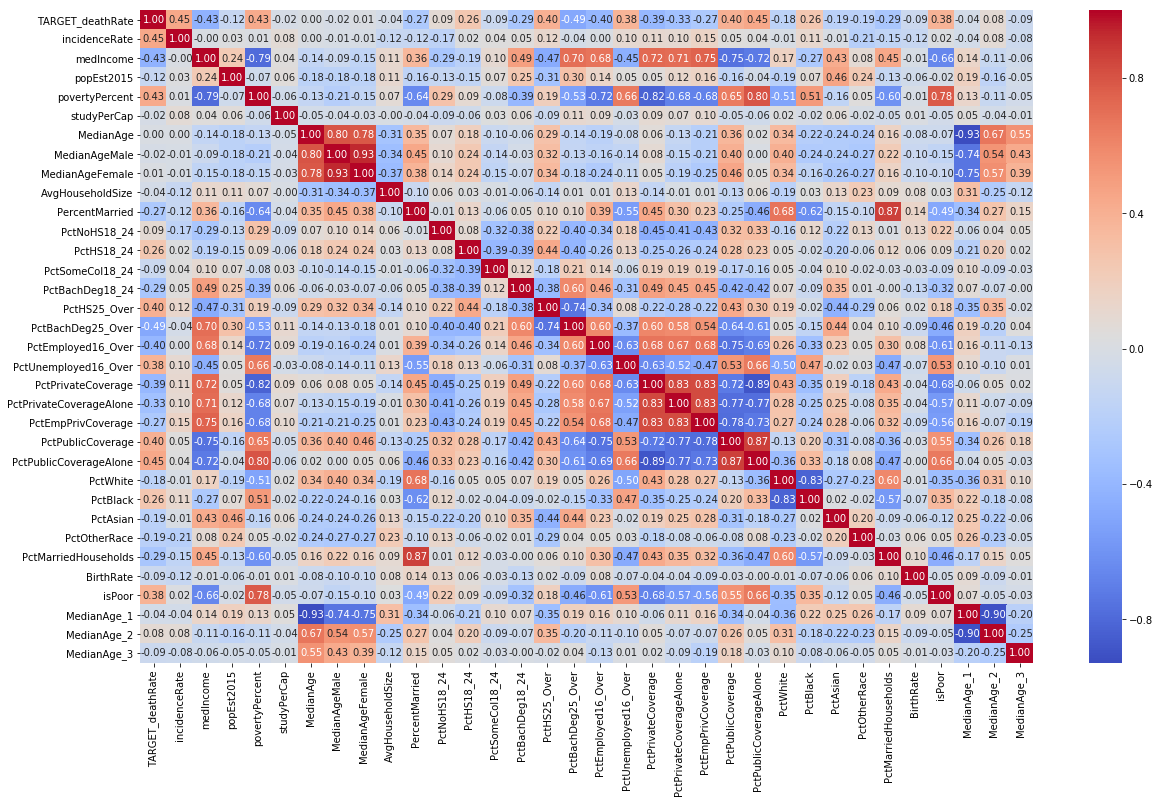

In [25]:
plt.figure(figsize=(20,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [26]:
x_val = df[['TARGET_deathRate','incidenceRate','medIncome','povertyPercent','PctHS25_Over','PctEmployed16_Over','PctUnemployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctPublicCoverage','PctPublicCoverageAlone']]

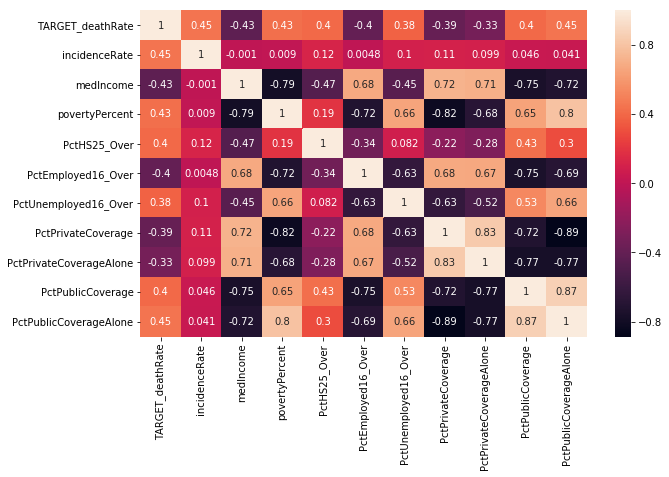

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(x_val.corr(), annot=True)
plt.show()

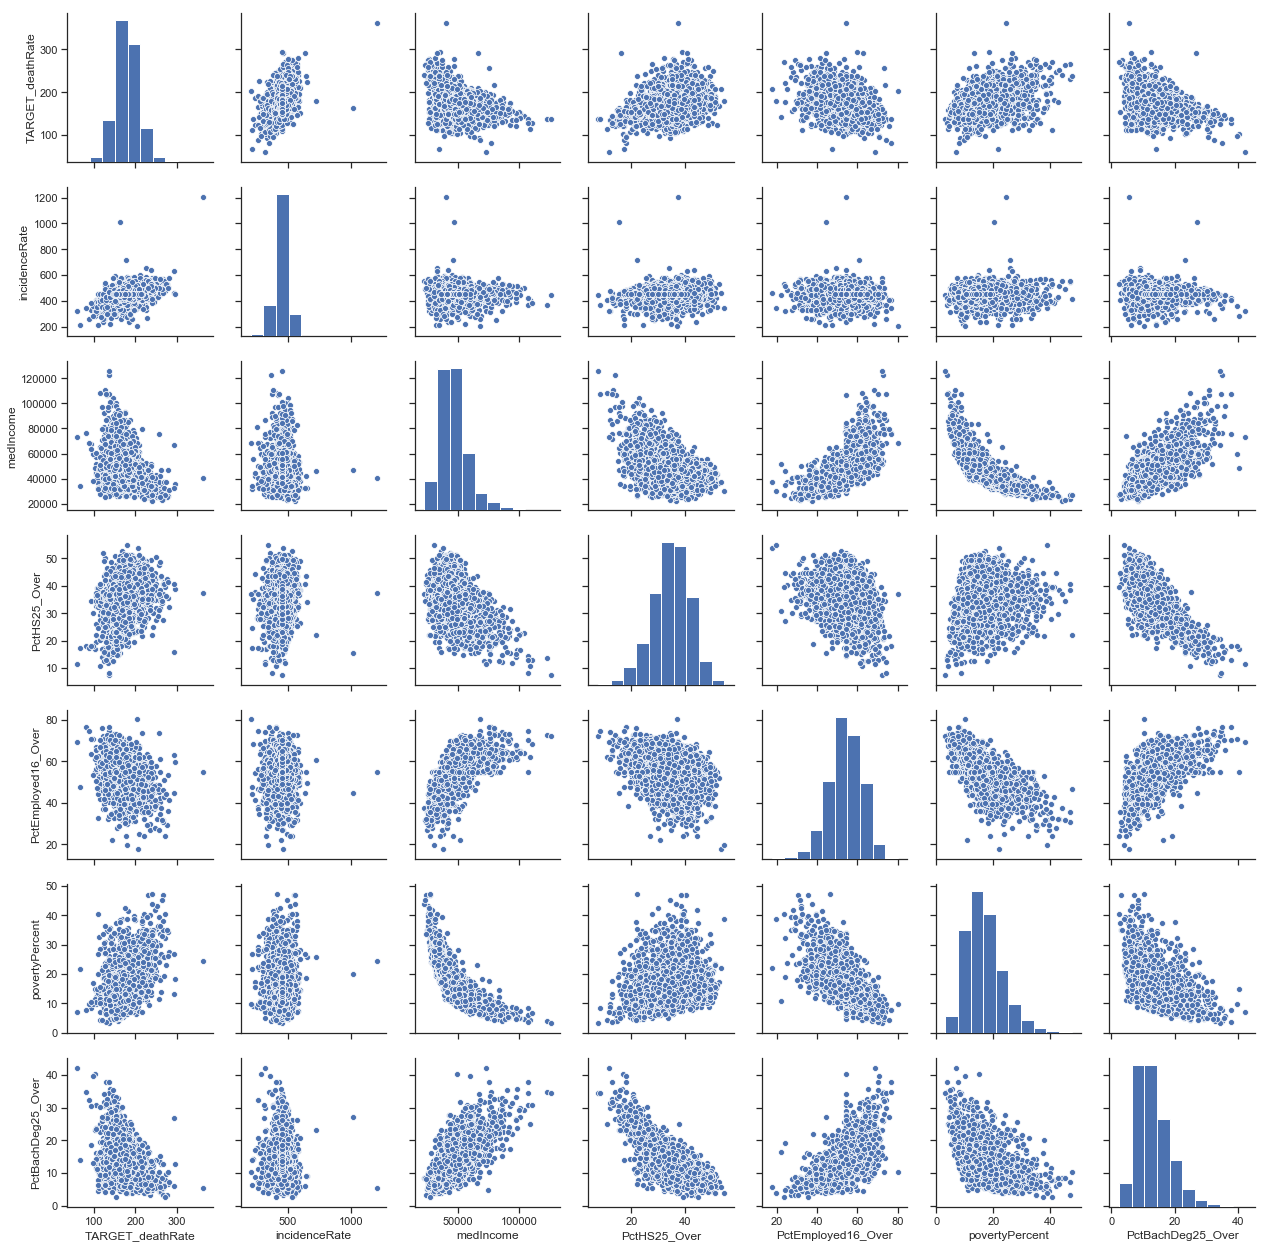

In [28]:
x1_val = df[['TARGET_deathRate','incidenceRate','medIncome','PctHS25_Over','PctEmployed16_Over','povertyPercent','PctBachDeg25_Over']]
x2_val = df[['TARGET_deathRate','PctUnemployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctPublicCoverage','PctPublicCoverageAlone']]
sns.set(style="ticks")
sns.pairplot(x1_val,palette="husl")
plt.show()

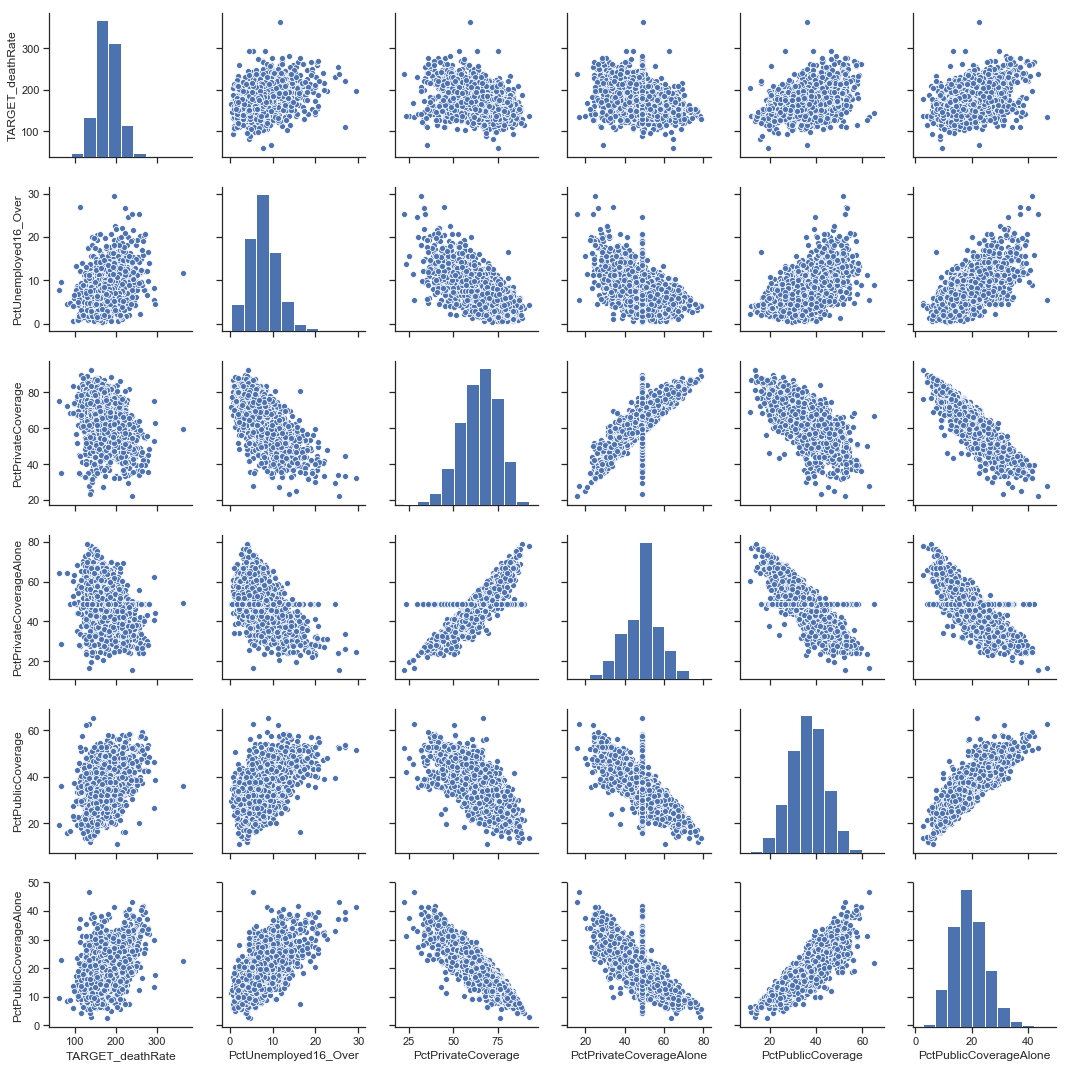

In [29]:
sns.set(style="ticks")
sns.pairplot(x2_val)
plt.show()

Dependant Variable: Target_deathRate <br />

In our dataset there are 35 original charecteristic out which 11 charecteristics have significant relationship to ur dependant variable. We will consider them as our predictors for our analysis<br />

Independant Variables: ['TARGET_deathRate','incidenceRate','medIncome','povertyPercent','PctHS25_Over',
'PctEmployed16_Over','PctUnemployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone',
'PctPublicCoverage','PctPublicCoverageAlone']

| Predictor Name                | Correlation         | Nature of relation       |
|-------------------------------|---------------------|--------------------------|
| incidenceRate                 |  0.45               | Positively Correlated    |
| medIncome                     | -0.43               | Negatively Correlated    |
| povertyPercent                |  0.43               | Positively Correlated    |
| PctHS25_Over                  |  0.4                | Positively Correlated    |
| PctEmployed16_Over            | -0.4                | Negatively Correlated    |
| PctUnemployed16_Over          |  0.38               | Positively Correlated    |
| PctPrivateCoverage            | -0.39               | Negatively Correlated    |
| PctPrivateCoverageAlone       | -0.33               | Negatively Correlated    |
| PctPublicCoverage             |  0.4                | Positively Correlated    |
| PctPublicCoverageAlone        |  0.45               | Positively Correlated    |


## Linear Regression

### Model 1

In [30]:
y= df['TARGET_deathRate']
x1 = df[['PctHS25_Over','PctUnemployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctPublicCoverage','PctPublicCoverageAlone','PctBachDeg25_Over','MedianAge_1','MedianAge_2','MedianAge_3','isPoor']]

In [31]:
# Add constant in metric form 
x=sm.add_constant(x1)
# x.reset_index(drop=True, inplace=True)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

- Splitting Data into training and testing dataset. Using statsmodel function train_test_split
- (X_train,y_train) : training dataset which is 80% of the dataset
- (X_test,y_test) : testing dataset which is 20% of the dataset
- training and testing data is bifurcate internaly by function train_test_split.

In [33]:
# results = sm.OLS(y_train.apply(pd.to_numeric),X_train.apply(pd.to_numeric)).fit()
results = sm.OLS(y_train,X_train).fit()

In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TARGET_deathRate   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     120.7
Date:                Mon, 25 Mar 2019   Prob (F-statistic):          2.09e-204
Time:                        20:10:32   Log-Likelihood:                -11045.
No. Observations:                2437   AIC:                         2.211e+04
Df Residuals:                    2426   BIC:                         2.218e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      66.3849      7.638      8.691      0.000      51.407      81.363
PctHS25_Over                0.9445      0.111      8.531      0.000       0.727       1.162
PctUnemployed16_Over        1.3291      0.183      7.280      0.000       0.971       1.687
PctPrivateCoverage          0.3582      0.133      2.694      0.007       0.097       0.619
PctPrivateCoverageAlone     0.1936      0.110      1.762      0.078      -0.022       0.409
PctPublicCoverage          -0.1418      0.187     -0.759      0.448      -0.508       0.225
PctPublicCoverageAlone      1.2591      0.278      4.530      0.000       0.714       1.804
PctBachDeg25_Over          -0.8034      0.174     -4.619      0.000      -1.144      -0.462
MedianAge_1                25.0559      2.550      9.828      0.000      20.056      30.055
MedianAge_2                23.3891      2.732      8.562      0.000      18.032      28.746
MedianAge_3                17.9399      3.219      5.573      0.000      11.627      24.253
isPoor                      8.3415      1.286      6.486      0.000       5.820      10.863
==============================================================================
Omnibus:                      125.522   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              467.574
Skew:                           0.013   Prob(JB):                    2.94e-102
Kurtosis:                       5.146   Cond. No.                     6.38e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.8e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

After fitting an ordinary least squares model with the ['PctHS25_Over','PctUnemployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctPublicCoverage',
'PctPublicCoverageAlone','PctBachDeg25_Over','MedianAge_1','MedianAge_2','MedianAge_3','isPoor'] <br />
regressed on the 'TARGET_deathRate' target variable, <br />

- we have a poor-performing model, as evidenced by the Adjusted R^2 (.339).

- We have PctPrivateCoverageAlone and PctPublicCoverage with P-Score above 0.05 standard value.

Let's treat this as our baseline, and apply model diagnostics and feature selection to try to improve it.

We will attempt to account for multicollinearity, heteroscedsticity of residuals, and normality of distributions of residuals.

In [35]:
predictions=results.predict(X_test)
predictions

2492    170.684633
2413    184.827622
2671    200.264334
1225    187.754519
622     163.170612
1356    164.526235
1527    164.145965
901     158.731012
1851    173.289424
2304    201.777087
1926    172.858259
2854    197.813095
1478    188.836120
1177    168.799436
1844    158.328783
2603    169.170890
2342    156.435475
2511    172.587347
2797    176.319235
491     167.600500
2901    205.238095
747     187.637678
2778    159.293549
1014    166.343459
2074    167.274096
104     168.198928
521     195.996936
2341    164.743749
2609    170.081718
777     175.767500
           ...    
2189    165.386592
1263    187.760330
1937    165.683779
1554    182.738601
1790    159.691424
1754    191.420084
1063    176.272211
3002    158.350263
494     199.233781
1150    173.249416
2628    146.252819
2400    179.239623
103     167.216027
1489    198.696007
863     198.082083
316     167.813204
539     201.325055
485     165.808792
3010    169.249628
1130    161.933167
2661    180.050592
1694    172.

In [36]:
y_test

2492    148.2
2413    170.3
2671    203.3
1225    181.3
622     164.9
1356    148.2
1527    175.0
901     193.7
1851    189.9
2304    143.1
1926    185.9
2854    213.6
1478    168.1
1177    169.0
1844    191.2
2603    179.6
2342    148.9
2511    180.7
2797    145.4
491     216.9
2901    192.1
747     160.0
2778    174.9
1014    167.2
2074    162.0
104     120.2
521     242.9
2341    173.4
2609    214.9
777     194.6
        ...  
2189    184.8
1263    172.5
1937    142.1
1554    166.1
1790    175.4
1754    174.7
1063    193.8
3002    140.7
494     259.1
1150    166.8
2628    151.9
2400    174.0
103     138.2
1489    362.8
863     189.0
316     165.5
539     233.0
485     177.0
3010    160.4
1130    160.0
2661    192.0
1694    144.6
2204    195.2
2335    140.9
2580    225.1
2914    192.2
2995    188.7
922     131.1
2892    208.6
2832    184.4
Name: TARGET_deathRate, Length: 610, dtype: float64

Plotting Y-Test vs Predictions

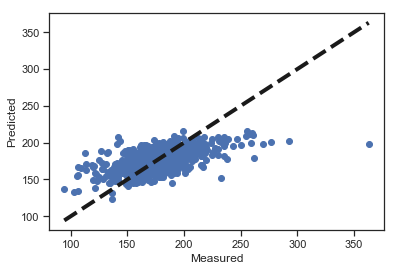

In [37]:
fig,ax = plt.subplots()
ax.scatter(y_test, predictions)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

- For the lower values on the X-axis and  higher values on the X-axis the points are not near the regression line.
- Plots shows there is varience in between y_test and Predictions. 

### Is the model good enough?

In [38]:
# Lower the RSME better the model
from sklearn.metrics import accuracy_score,mean_squared_error
RMSE=np.sqrt(mean_squared_error(y_test,predictions))
RMSE

23.28357506574564

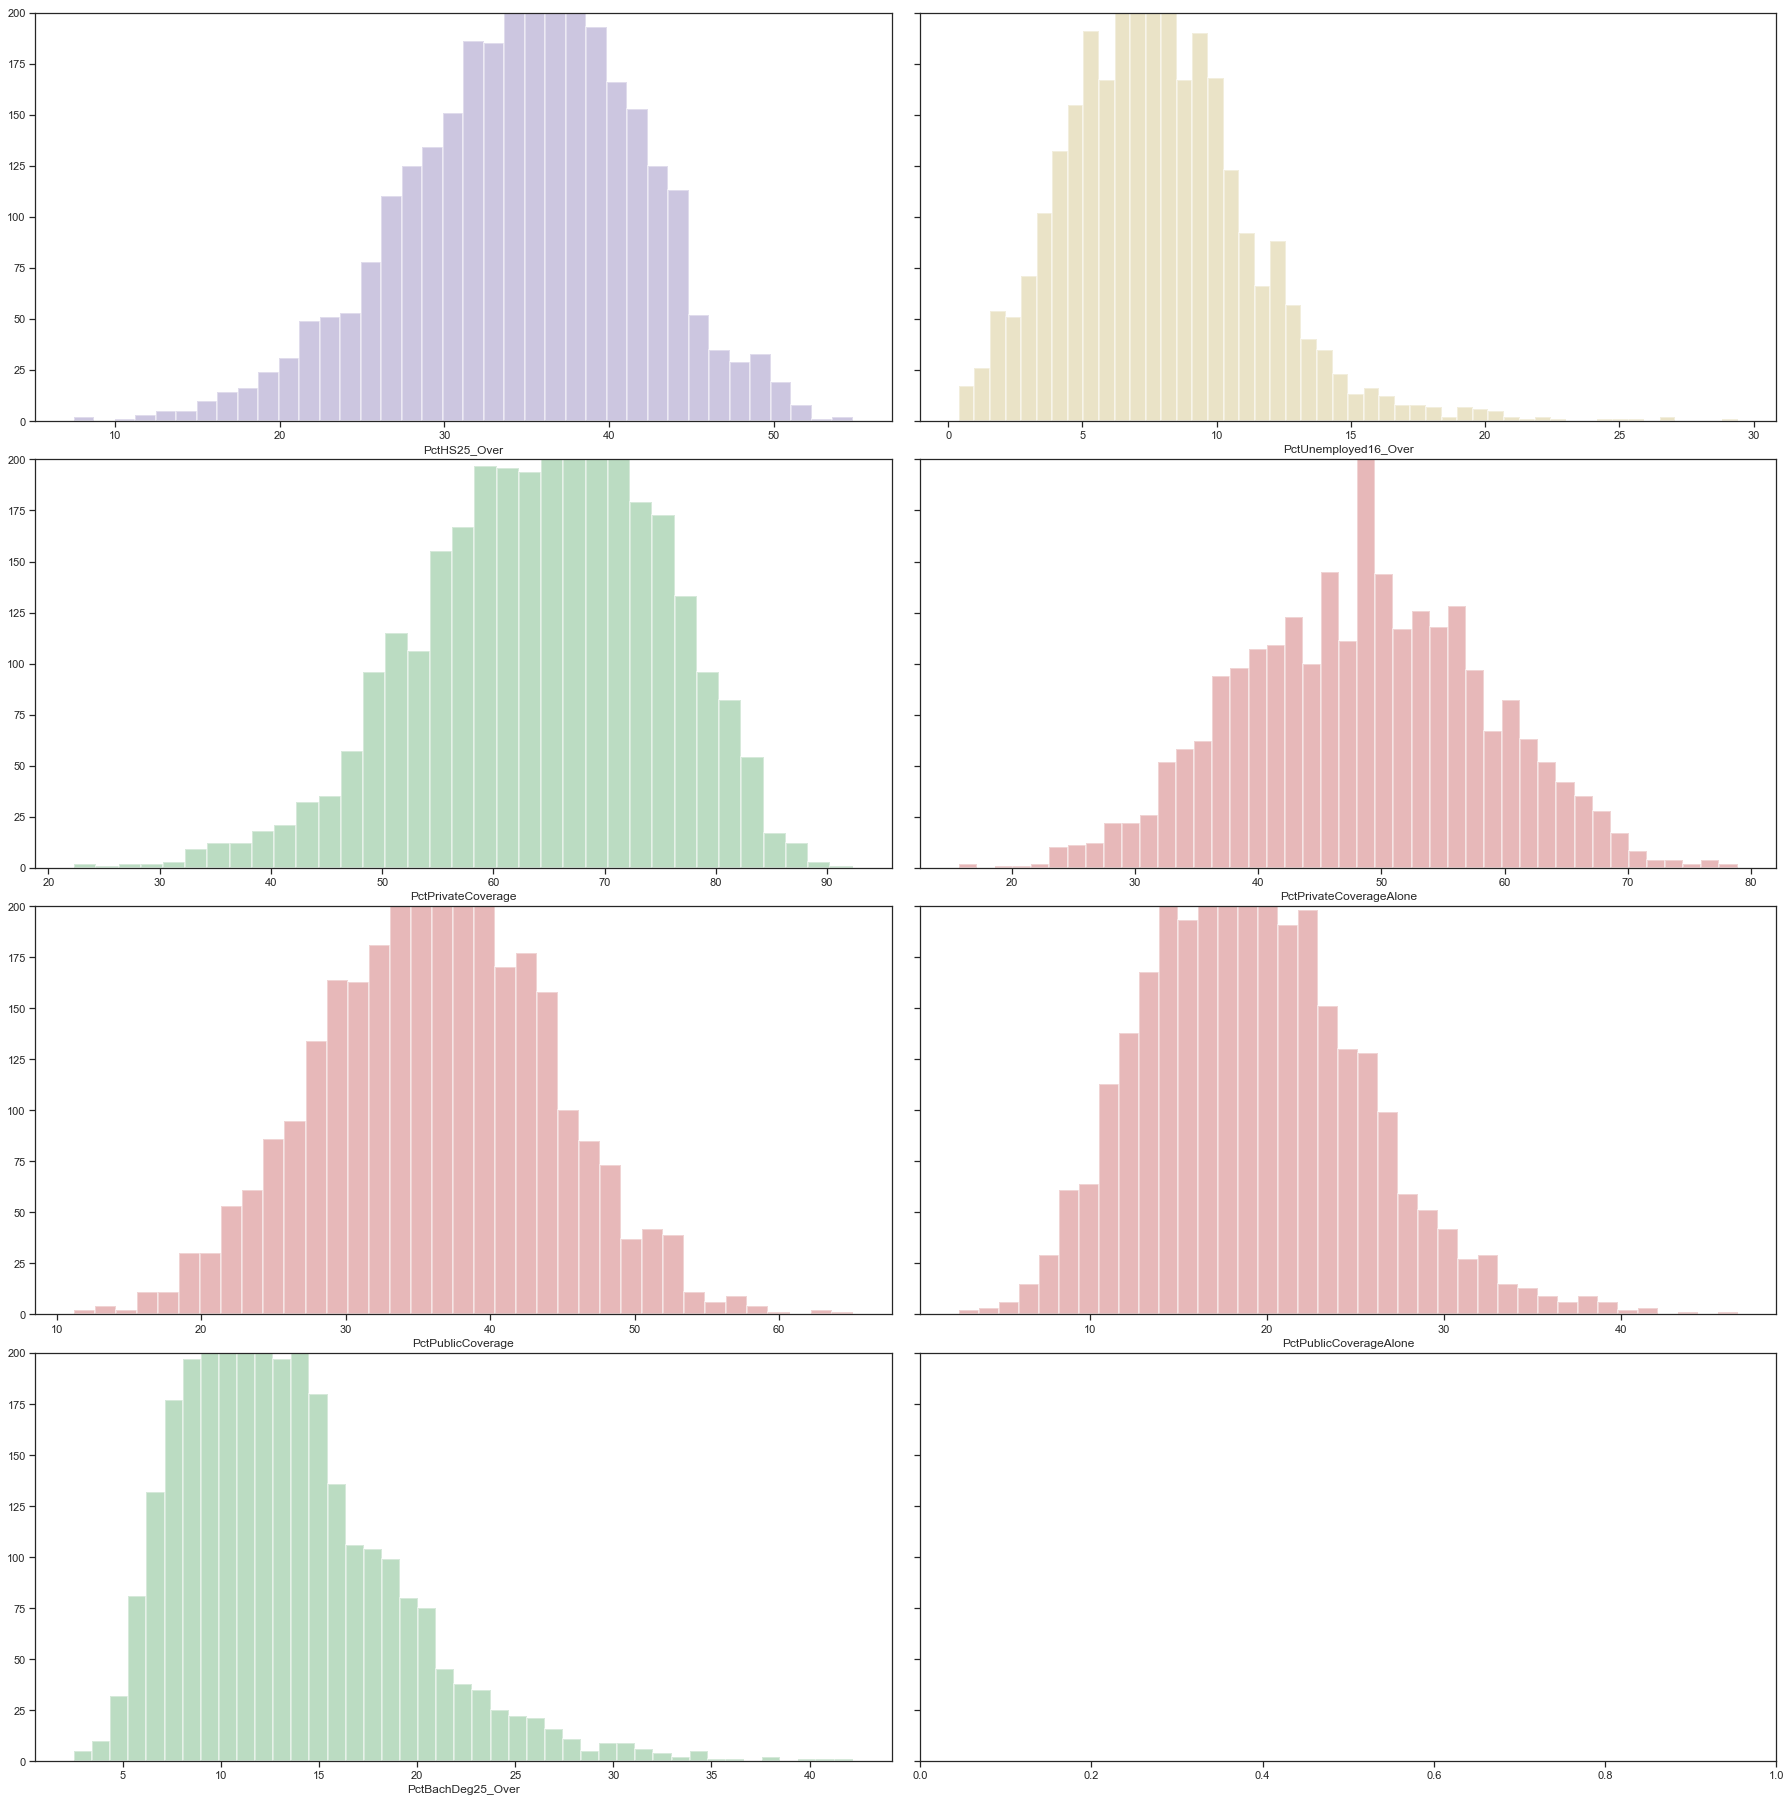

In [39]:
import seaborn as sns
colors = np.array('b g r c m y'.split()) #Different colors for plotting

fig,axes = plt.subplots(nrows =4,ncols=2, sharey=True,figsize = (25,25))
plt.tight_layout()
row = 0
iteration = 0
for j in range(0,len(x1.columns[:-4])):
    iteration+=1
    if(j%2==0):
        k = 0
    else:
        k = 1
    sns.distplot(x1[x1.columns[j]],kde=False,hist_kws=dict(edgecolor="w", linewidth=2),
                 color = np.random.choice(colors) ,ax=axes[row][k])
    if(iteration%2==0):
        row+=1
        plt.ylim(0,200)

All predictors are normally distributed except for pctBatchDeg25_over wich skewed to the left.


### Are residuals normally distributed?

#### In regression analysis, the difference between the observed value of the dependent variable (i.e TARGET_deathRate) and the predicted value (predictions) is called the residual.

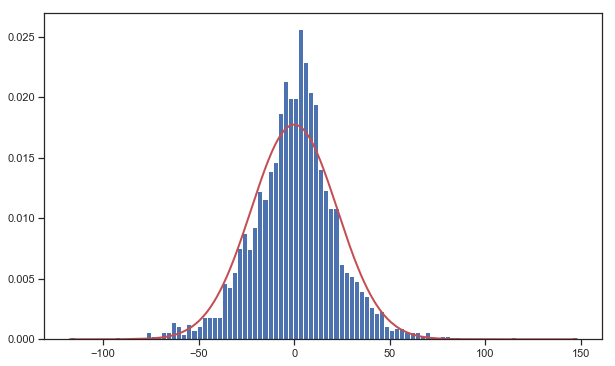

In [40]:
# histogram superimposed by normal curve
plt.figure(figsize=(10,6))
import scipy.stats as stats
mu = np.mean(results.resid)
sigma = np.std(results.resid)
pdf = stats.norm.pdf(sorted(results.resid), mu, sigma)
plt.hist(results.resid, bins=100, normed=True)
plt.plot(sorted(results.resid), pdf, color='r', linewidth=2)
plt.show()

Figure above is histogram superimposed by normal curve.<br />

- The distribution of the residuals does not adhere perfectly to a normal distribution (skew=0, excess kurtosis=0).
- There is a small number of outliers to the left, the tails appear slightly fatter than, and the distribution has somewhat larger kurtosis (i.e 6.072) than the normal distribution.

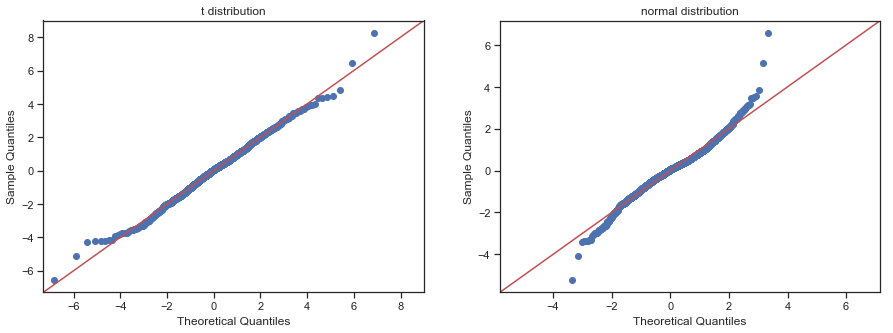

In [41]:
# QQplot
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(15,5))
sm.qqplot(results.resid, stats.t, fit=True, line='45', ax = ax1)
ax1.set_title("t distribution")
sm.qqplot(results.resid, stats.norm, fit=True, line='45', ax=ax2)
ax2.set_title("normal distribution")
plt.show()

- The qqplots confirm that the residuals adhere more closely to the t- than normal distribution (fatter tails). <br />
- A few prominent outliers are visible at the lower and upper extreme. <br />
- All-in-all, despite these imperfections, I consider the distribution of residuals to be adequate. <br />
- However, we should investigate the nature of the more extreme outliers. <br />
- We also may want to try to add additional information or to change the predictors (We will be doing it in Model 2).

### Are any model assumptions violated?
#### Homoscedasticity & Heteroscedasticity

Homoscedasticity means that the variance around the regression line is the same for all values of the predictor variable (i.e TARGET_deathRate). 

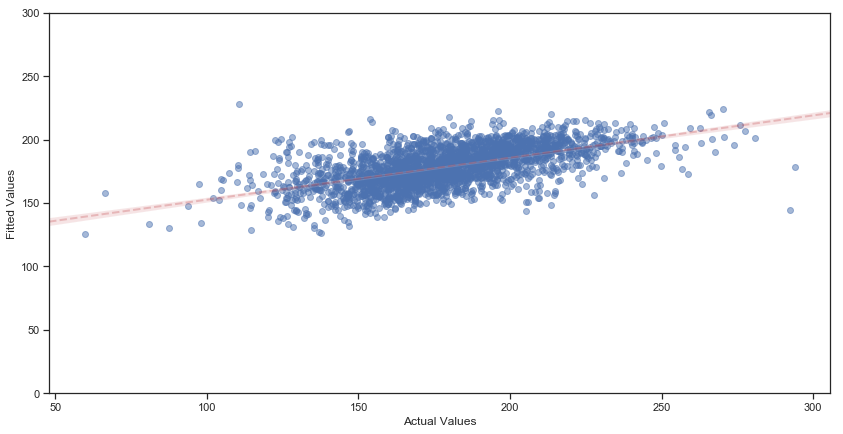

Pearson R:  (0.5763937185606975, 8.531940400622275e-216)


In [42]:
# plot predicted vs actual
plt.figure(figsize=(14,7))
sns.regplot(y_train, results.fittedvalues, line_kws={'color':'r', 'alpha':0.3, 
                                              'linestyle':'--', 'linewidth':2}, 
            scatter_kws={'alpha':0.5})
plt.ylim(0,300)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
plt.show()
print("Pearson R: ", stats.pearsonr(results.fittedvalues, y_train))

- From the plot we can infer that fitted values and actual values are collinear.
- The fiitet values sticks to the reggression line so there is no assumption violated.
- For the lower values on the X-axis and  higher values on the X-axis the points are all very near the regression line.
- Consistent with our reported R^2 value, we now visualize the strong correlation between actual and predicted values.
- no assumption are violated

#### Plotting actual values versus residuals

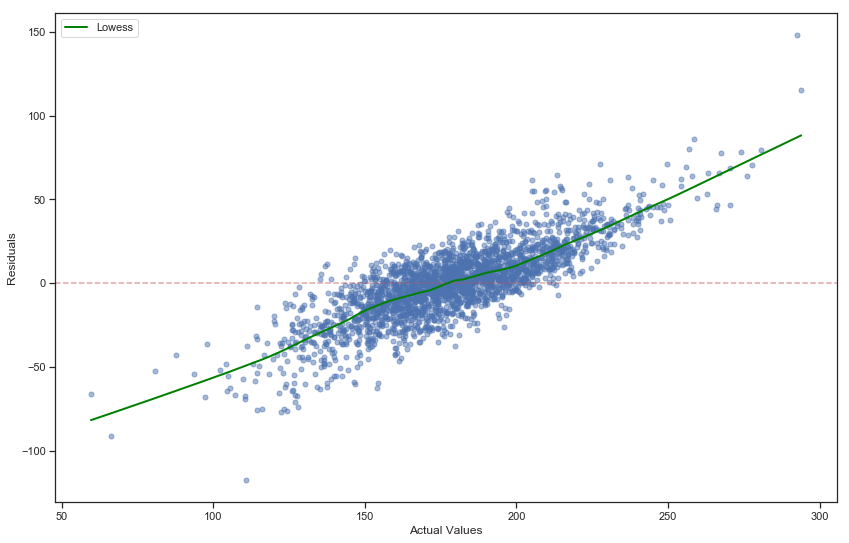

Pearson R: (0.8171721245880643, 0.0)


In [43]:
from statsmodels.nonparametric.smoothers_lowess import lowess
ys = lowess(results.resid.values, y_train, frac=0.2)
ys = pd.DataFrame(ys, index=range(len(ys)), columns=['a', 'b'])
ys = ys.sort_values(by='a')

fig, ax = plt.subplots(figsize=(14,9))
plt.scatter(y_train, results.resid, alpha=0.5, s=25)
plt.axhline(y=0, color='r', linestyle="--", alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")

plt.plot(ys.a, ys.b, c='green', linewidth=2, label="Lowess")
plt.legend()
plt.show()
print("Pearson R:", stats.pearsonr(y_train, results.resid))

- A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis.
- This chart suggests values are plottet randomly and linear Model is appropriate for data.

### Cross-Validation

In [44]:
modelL1 = LinearRegression()
model = modelL1.fit(X_train,y_train)

In [45]:
predictions_linear=model.predict(X_test)
predictions_linear

array([170.68463283, 184.82762212, 200.26433399, 187.75451906,
       163.1706123 , 164.52623487, 164.14596532, 158.73101231,
       173.28942408, 201.77708679, 172.8582589 , 197.81309545,
       188.83611985, 168.79943593, 158.32878266, 169.17088966,
       156.43547456, 172.58734741, 176.31923544, 167.60050003,
       205.23809498, 187.63767804, 159.29354911, 166.34345905,
       167.27409597, 168.19892841, 195.99693587, 164.74374887,
       170.08171774, 175.76750013, 206.44658193, 191.13226057,
       181.10710424, 183.3202099 , 163.05480152, 191.32567858,
       171.77285178, 188.42949383, 202.14727767, 175.42163297,
       164.57705978, 175.92399253, 191.37584036, 197.69820429,
       190.34651515, 150.00869627, 173.88324659, 144.92423545,
       178.97424504, 171.35513692, 169.05641486, 190.09115401,
       157.13372263, 175.39879953, 152.75292068, 187.25845975,
       187.67631892, 160.86769325, 200.44882595, 165.71889641,
       151.27000132, 176.47929031, 161.21017608, 180.38

#### Comparing Both the output for first 5 values

In [46]:
print ('Actual Predictions :' )
print(predictions[0:5])
print ('Cross-Validation Predictions :')
print(predictions_linear[0:5])

Actual Predictions :
2492    170.684633
2413    184.827622
2671    200.264334
1225    187.754519
622     163.170612
dtype: float64
Cross-Validation Predictions :
[170.68463283 184.82762212 200.26433399 187.75451906 163.1706123 ]


- from both the results we can infer that the our predictions are currect for the model

In [47]:
scores_train = cross_val_score(model, X_train,y_train, cv=5)
print(scores_train)
print("Accuracy:  %0.2f (+/- %0.2f): " % (scores_train.mean(),scores_train.std()*2))        

[0.29415217 0.35399274 0.31667848 0.29855569 0.33442057]
Accuracy:  0.32 (+/- 0.04): 


In [48]:
scores_test = cross_val_score(model, X_test,y_test, cv=5)
print(scores_test)
print("Accuracy:  %0.2f (+/- %0.2f): " % (scores_test.mean(),scores_test.std()*2))

[0.29470041 0.33264876 0.32215849 0.31933935 0.28572733]
Accuracy:  0.31 (+/- 0.04): 


### Multicollinearity

AxesSubplot(0.125,0.125;0.62x0.755)


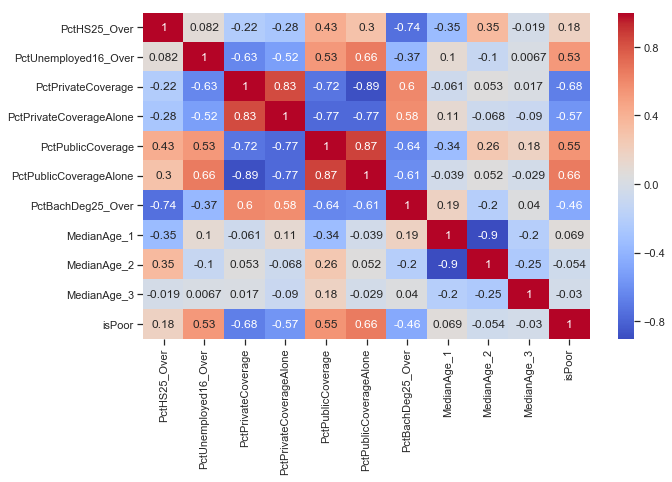

In [49]:
plt.figure(figsize=(10,6))
print(sns.heatmap(x1.corr(), annot=True,cmap='coolwarm'))
plt.show()

- In this model most of the predictors are higly correllated to each other.
- PctPrivateCoverage and PctPublicCoverage Alone have correlation with most of the other predactors
- for better analysis we will be using diffrent predictors in next model.

Let's apply variance inflation factors to assess for multicollinearity. 
VIFs, by performing an independent variable on the design matrix comprising all the other independent variables, allows us to assess the degree to which that independent variable is orthogonal the others. <br />
Larger VIFs indicate multicollinearity. <br />

In [50]:
pd.DataFrame([[var, variance_inflation_factor(x.values, x.columns.get_loc(var))] for var in x.columns],
                   index=range(x.shape[1]), columns=['Variable', 'VIF'])

,Variable,VIF
0,const,0.000000
1,PctHS25_Over,2.941292
2,PctUnemployed16_Over,1.895066
3,PctPrivateCoverage,9.341825
4,PctPrivateCoverageAlone,4.569447
5,PctPublicCoverage,10.129969
6,PctPublicCoverageAlone,13.634840
7,PctBachDeg25_Over,4.176348
8,MedianAge_1,inf
9,MedianAge_2,inf


Variance Inflation Factor (VIF) – the variance inflation factor of the linear regression is defined as VIF = 1/T. With VIF > 10 there is an indication that multicollinearity may be present; with VIF > 100 there is certainly multicollinearity among the variables. <br />
In the above model, Multicollinearity is present.
- PctPublicCoverage and PctPublicCoverageAlone have high VIFs

### Model 2

In [51]:
y= df['TARGET_deathRate']
x1 = df[['incidenceRate','PctHS25_Over','PctPublicCoverage','PctEmployed16_Over','MedianAge_1','MedianAge_2','MedianAge_3','isPoor']]
# x1=df[['PctHS25_Over','PctUnemployed16_Over','PctPublicCoverageAlone','isPoor','PctBachDeg25_Over','MedianAge_1','MedianAge_2','MedianAge_3']]

In [52]:
# Add constant in metric form 
x=sm.add_constant(x1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [54]:
# results = sm.OLS(y_train.apply(pd.to_numeric),X_train.apply(pd.to_numeric)).fit()
results = sm.OLS(y_train,X_train).fit()

In [55]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TARGET_deathRate   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     276.2
Date:                Mon, 25 Mar 2019   Prob (F-statistic):          2.91e-303
Time:                        20:10:36   Log-Likelihood:                -10837.
No. Observations:                2437   AIC:                         2.169e+04
Df Residuals:                    2429   BIC:                         2.174e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 40.9917      5.911      6.935      0.000      29.401      52.583
incidenceRate          0.2032      0.008     26.632      0.000       0.188       0.218
PctHS25_Over           0.9765      0.069     14.087      0.000       0.841       1.112
PctPublicCoverage      0.4589      0.092      4.980      0.000       0.278       0.640
PctEmployed16_Over    -0.4685      0.085     -5.519      0.000      -0.635      -0.302
MedianAge_1           20.2710      2.009     10.088      0.000      16.331      24.211
MedianAge_2           15.2363      2.187      6.966      0.000      10.947      19.525
MedianAge_3            5.4843      2.422      2.264      0.024       0.735      10.234
isPoor                 8.7076      1.122      7.759      0.000       6.507      10.908
==============================================================================
Omnibus:                      183.951   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              642.586
Skew:                           0.323   Prob(JB):                    2.91e-140
Kurtosis:                       5.431   Cond. No.                     2.94e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.89e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [56]:
predictions=results.predict(X_test)
predictions

401     171.834415
895     167.512314
532     190.709626
703     213.939203
1161    174.815971
2791    164.720476
2097    175.584975
2167    200.511624
1773    181.589469
754     225.144575
1795    177.758353
2752    181.947734
343     193.285156
870     173.855777
2501    177.453026
2064    156.818506
1215    196.914204
2645    205.988565
1016    173.847310
1634    196.861702
1475    157.800256
665     170.995101
1967    142.027614
1202    217.148936
2805    158.995012
375     183.594697
2282    192.648858
1988    185.747327
2266    185.712082
697     172.600943
           ...    
1420    186.997223
909     157.271630
822     185.995965
58      202.639670
1511    187.100351
2368    200.142631
826     179.047312
506     157.285982
176     186.481801
1627    196.111372
1254    198.018350
900     176.551199
1786    176.141373
2499    159.666242
1865    155.144177
701     179.013568
1911    185.971497
1438    171.266244
1018    173.417429
1582    191.942413
2742    195.978679
1796    162.

In [57]:
y_test

401     181.0
895     163.0
532     194.5
703     230.9
1161    168.0
2791    162.6
2097    163.8
2167    204.6
1773    212.1
754     255.9
1795    215.5
2752    179.1
343     207.6
870     173.7
2501    169.9
2064    121.4
1215    236.0
2645    126.4
1016    168.9
1634    210.9
1475    144.3
665     223.9
1967    138.2
1202    220.9
2805    155.3
375     160.7
2282    210.3
1988    209.2
2266    218.8
697     190.8
        ...  
1420    168.7
909     158.8
822     186.5
58      213.3
1511    174.7
2368    196.0
826     193.6
506     166.2
176     134.3
1627    185.1
1254    219.7
900     173.1
1786    157.8
2499    133.3
1865    189.7
701     185.6
1911    205.0
1438    186.7
1018    168.0
1582    186.5
2742    196.6
1796    131.2
1534    211.7
2176    196.4
2903    178.5
2731    191.4
2623    228.0
542     195.2
2770    224.8
225     176.8
Name: TARGET_deathRate, Length: 610, dtype: float64

Plotting Y-Test vs Predictions

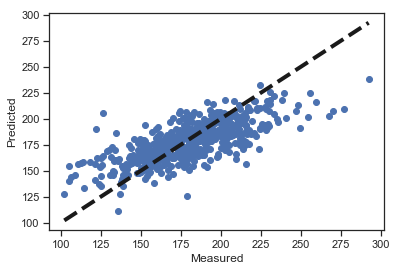

In [58]:
fig,ax = plt.subplots()
ax.scatter(y_test, predictions)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

### Is the model good enough

In [59]:
# Lower the RSME better the model
from sklearn.metrics import accuracy_score,mean_squared_error
crossVal_Model1=np.sqrt(mean_squared_error(y_test,predictions))
crossVal_Model1

19.373197706377734

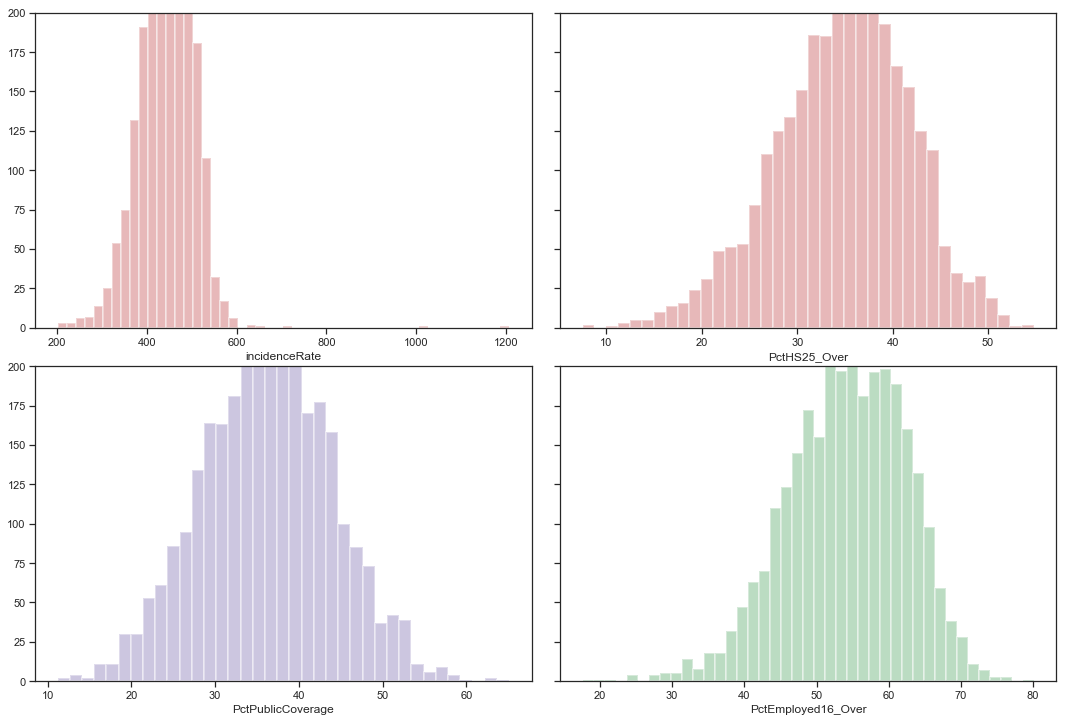

In [60]:
import seaborn as sns
colors = np.array('b g r c m y'.split()) #Different colors for plotting

fig,axes = plt.subplots(nrows =2,ncols=2, sharey=True,figsize = (15,10))
plt.tight_layout()
row = 0
iteration = 0
for j in range(0,len(x1.columns[:-4])):
    iteration+=1
    if(j%2==0):
        k = 0
    else:
        k = 1
    sns.distplot(x1[x1.columns[j]],kde=False,hist_kws=dict(edgecolor="w", linewidth=2),
                 color = np.random.choice(colors) ,ax=axes[row][k])
    if(iteration%2==0):
        row+=1
        plt.ylim(0,200)

All predictors are normally distributed.

### Are residuals normally distributed?
#### In regression analysis, the difference between the observed value of the dependent variable (i.e TARGET_deathRate) and the predicted value (predictions) is called the residual.

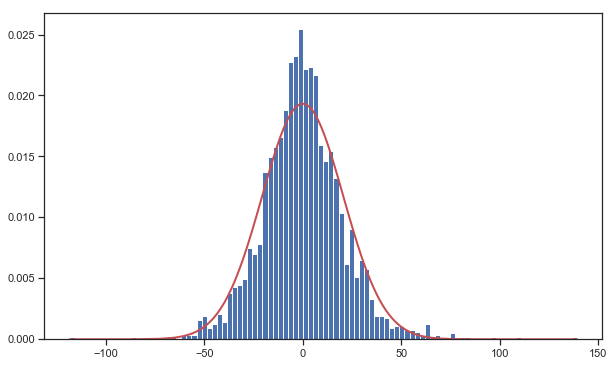

In [61]:
# histogram superimposed by normal curve
plt.figure(figsize=(10,6))
import scipy.stats as stats
mu = np.mean(results.resid)
sigma = np.std(results.resid)
pdf = stats.norm.pdf(sorted(results.resid), mu, sigma)
plt.hist(results.resid, bins=100, normed=True)
plt.plot(sorted(results.resid), pdf, color='r', linewidth=2)
plt.show()

Figure above is histogram superimposed by normal curve.
- The distribution of the residuals does not adhere perfectly to a normal distribution (skew=0, excess kurtosis=0).
- There is a small number of outliers to the left, the tails appear slightly fatter than, and the distribution has moderate kurtosis (i.e 4.973).

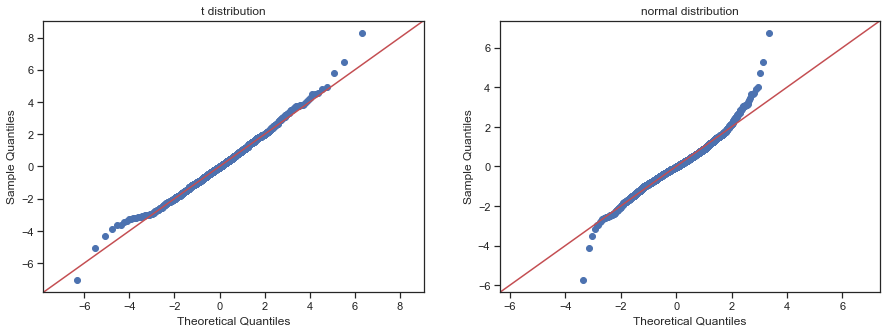

In [62]:
# QQplot
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(15,5))
sm.qqplot(results.resid, stats.t, fit=True, line='45', ax = ax1)
ax1.set_title("t distribution")
sm.qqplot(results.resid, stats.norm, fit=True, line='45', ax=ax2)
ax2.set_title("normal distribution")
plt.show()

- The qqplots confirm that the residuals adhere more closely to the t- than normal distribution (fatter tails). <br />
- A few prominent outliers are visible at the lower and upper extreme. <br />
- All-in-all, despite these imperfections, I consider the distribution of residuals to be adequate. <br />
- However, we should investigate the nature of the more extreme outliers. <br />
- We also may want to try to add additional information or to change the predictors (We will be doing it in Model 3).

### Are any model assumptions violated?
#### Homoscedasticity & Heteroscedasticity
Homoscedasticity means that the variance around the regression line is the same for all values of the predictor variable (i.e TARGET_deathRate).

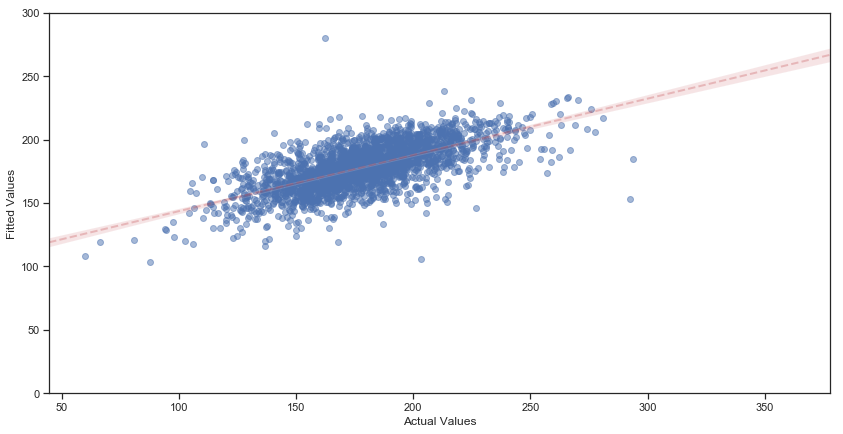

Pearson R:  (0.6657293389185263, 6.000070460007e-312)


In [63]:
# plot predicted vs actual
plt.figure(figsize=(14,7))
sns.regplot(y_train, results.fittedvalues, line_kws={'color':'r', 'alpha':0.3, 
                                              'linestyle':'--', 'linewidth':2}, 
            scatter_kws={'alpha':0.5})
plt.ylim(0,300)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
plt.show()
print("Pearson R: ", stats.pearsonr(results.fittedvalues, y_train))

- From the plot we can infer that fitted values and actual values are collinear.
- The fiitet values sticks to the reggression line so there is no assumption violated.
- For the lower values on the X-axis and  higher values on the X-axis the points are all very near the regression line.
- Consistent with our reported R^2 value, we now visualize the strong correlation between actual and predicted values.
- no assumption are violated

#### Plotting actual values versus residuals

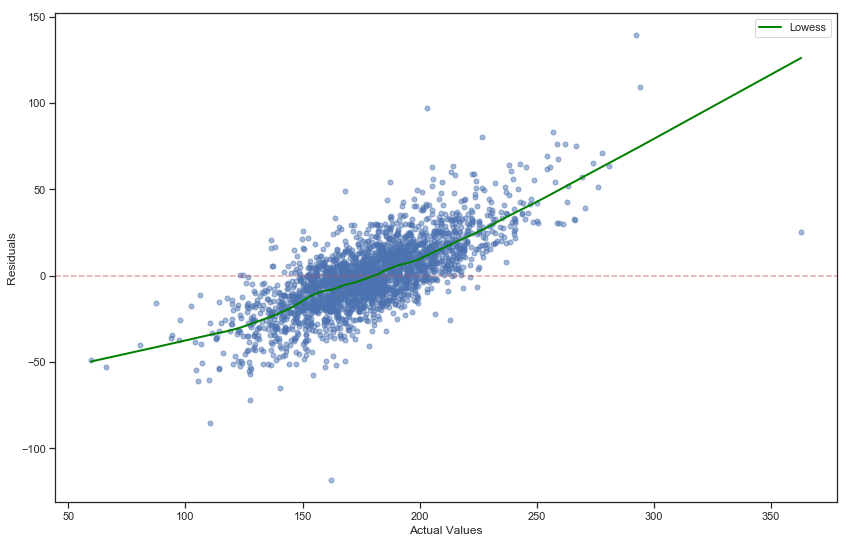

Pearson R: (0.7461933042470309, 0.0)


In [64]:
from statsmodels.nonparametric.smoothers_lowess import lowess
ys = lowess(results.resid.values, y_train, frac=0.2)
ys = pd.DataFrame(ys, index=range(len(ys)), columns=['a', 'b'])
ys = ys.sort_values(by='a')

fig, ax = plt.subplots(figsize=(14,9))
plt.scatter(y_train, results.resid, alpha=0.5, s=25)
plt.axhline(y=0, color='r', linestyle="--", alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")

plt.plot(ys.a, ys.b, c='green', linewidth=2, label="Lowess")
plt.legend()
plt.show()
print("Pearson R:", stats.pearsonr(y_train, results.resid))

- A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis.
- This chart suggests values are plottet randomly and linear Model is appropriate for data.

### Cross-Validation

In [65]:
modelL1 = LinearRegression()
model = modelL1.fit(X_train,y_train)

In [66]:
predictions_linear=model.predict(X_test)
predictions_linear

array([171.83441496, 167.51231411, 190.70962637, 213.93920301,
       174.81597125, 164.7204759 , 175.58497451, 200.51162351,
       181.58946878, 225.14457453, 177.75835276, 181.9477339 ,
       193.28515597, 173.85577696, 177.45302588, 156.81850592,
       196.91420373, 205.98856484, 173.84730992, 196.86170214,
       157.80025616, 170.99510068, 142.02761445, 217.14893556,
       158.99501243, 183.59469656, 192.64885762, 185.74732694,
       185.71208211, 172.60094311, 186.14450868, 178.2760853 ,
       187.71728998, 157.99204646, 149.01829286, 151.84889155,
       206.49617675, 135.61353339, 168.92220991, 156.50234594,
       169.18633568, 174.60411368, 198.51123268, 177.01209707,
       152.72195006, 146.19316553, 163.1581083 , 189.88461457,
       178.960855  , 163.96933121, 197.33389089, 164.03067925,
       171.18872561, 146.25880471, 161.84287317, 198.31535453,
       175.92095251, 182.00324759, 146.27766156, 163.7199386 ,
       162.21144123, 137.35849372, 194.20389373, 180.81

#### Comparing Both the output for first 5 values

In [67]:
print ('Actual Predictions :' )
print(predictions[0:5])
print ('Cross-Validation Predictions :')
print(predictions_linear[0:5])

Actual Predictions :
401     171.834415
895     167.512314
532     190.709626
703     213.939203
1161    174.815971
dtype: float64
Cross-Validation Predictions :
[171.83441496 167.51231411 190.70962637 213.93920301 174.81597125]


- from both the results we can infer that the our predictions are currect for the model

In [68]:
# R-Square value calculted 5 times
scores_train = cross_val_score(model, X_train,y_train, cv=5)
print(scores_train)
print("Accuracy:  %0.2f (+/- %0.2f): " % (scores_train.mean(),scores_train.std()*2))

[0.50779945 0.48591626 0.47787427 0.41778344 0.27603336]
Accuracy:  0.43 (+/- 0.17): 


In [69]:
scores_test = cross_val_score(model, X_test,y_test, cv=5)
print(scores_test)
print("Accuracy:  %0.2f (+/- %0.2f): " % (scores_test.mean(),scores_test.std()*2))

[0.58520718 0.46034657 0.5766322  0.39976908 0.51863084]
Accuracy:  0.51 (+/- 0.14): 


### Multicollinearity

AxesSubplot(0.125,0.125;0.62x0.755)


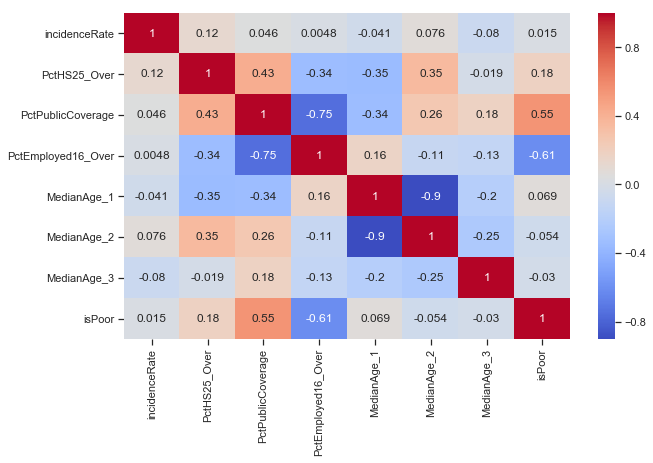

In [70]:
plt.figure(figsize=(10,6))
print(sns.heatmap(x1.corr(), annot=True,cmap='coolwarm'))
plt.show()

- PctEmployed16_over has strong Collinearity with  PctPublicCoverag and isPoor
- medianAge_1 and medianAge_2 has very high correlation.
- we will be dropping these PctEmployed16_over and medianAge_1 in our next moel for better R^2 value.

Let's apply variance inflation factors to assess for multicollinearity. VIFs, by performing an independent variable on the design matrix comprising all the other independent variables, allows us to assess the degree to which that independent variable is orthogonal the others. 
Larger VIFs indicate multicollinearity. 



In [71]:
pd.DataFrame([[var, variance_inflation_factor(x.values, x.columns.get_loc(var))] for var in x.columns],
                   index=range(x.shape[1]), columns=['Variable', 'VIF'])

,Variable,VIF
0,const,0.000000
1,incidenceRate,1.025784
2,PctHS25_Over,1.345169
3,PctPublicCoverage,2.957726
4,PctEmployed16_Over,2.673239
5,MedianAge_1,inf
6,MedianAge_2,inf
7,MedianAge_3,inf
8,isPoor,1.826838


Variance Inflation Factor (VIF) – the variance inflation factor of the linear regression is defined as VIF = 1/T. With VIF > 10 there is an indication that multicollinearity may be present; with VIF > 100 there is certainly multicollinearity among the variables. 
In the above model, Multicollinearity is present.

All the predictors have acceptable VIF.

### Model 3

In [72]:
y= df['TARGET_deathRate']
x1 = df[['incidenceRate','PctHS25_Over','PctUnemployed16_Over','PctPrivateCoverage','MedianAge_3','isPoor']]

In [73]:
# Add constant in metric form 
x=sm.add_constant(x1,prepend=True)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.5)
# Splitting Data into training and testing dataset. Using in built function train_test_split
# (X_train,y_train) : training dataset which is 80% of all data
# (X_test,y_test) : testing dataset which is 80% of all data
# training and testing data is bifurcate internaly byfunction train_test_split.

In [75]:
# results = sm.OLS(y_train.apply(pd.to_numeric),X_train.apply(pd.to_numeric)).fit()
results = sm.OLS(y_train,X_train).fit()

In [76]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TARGET_deathRate   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     218.7
Date:                Mon, 25 Mar 2019   Prob (F-statistic):          3.19e-201
Time:                        20:10:38   Log-Likelihood:                -6750.7
No. Observations:                1523   AIC:                         1.352e+04
Df Residuals:                    1516   BIC:                         1.355e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   79.0673      7.488     10.560      0.000      64.380      93.755
incidenceRate            0.2193      0.010     22.129      0.000       0.200       0.239
PctHS25_Over             0.9268      0.078     11.945      0.000       0.775       1.079
PctUnemployed16_Over     0.5774      0.198      2.923      0.004       0.190       0.965
PctPrivateCoverage      -0.6081      0.079     -7.742      0.000      -0.762      -0.454
MedianAge_3             -4.4702      2.412     -1.853      0.064      -9.201       0.261
isPoor                   8.5956      1.453      5.918      0.000       5.746      11.445
==============================================================================
Omnibus:                      125.659   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              451.351
Skew:                           0.345   Prob(JB):                     9.78e-99
Kurtosis:                       5.576   Cond. No.                     6.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
predictions=results.predict(X_test)
predictions

2802    166.021425
122     191.093644
544     193.854718
1626    165.127931
2188    131.003968
506     156.319682
534     188.302186
51      213.605836
1224    193.566386
1300    176.290493
144     184.156325
2465    168.292379
1862    128.685326
1836    158.579950
2452    195.973843
2261    179.803903
1564    171.987401
2542    184.555501
2662    205.787288
1475    164.003328
1751    184.752826
386     185.648291
1240    177.503286
2983    174.468619
385     183.672740
984     155.201604
2045    182.023020
2745    156.785763
1183    164.076354
2018    205.579455
           ...    
2622    193.336397
1361    166.347439
1987    171.644108
2977    182.550112
1633    187.591729
1269    193.277761
2058    194.049576
557     172.075196
139     162.081229
2754    181.110359
1568    163.244878
1547    181.687810
1816    151.502921
1554    179.587200
1849    188.979488
747     195.479221
8       190.446234
164     155.464145
559     191.242972
1279    161.507122
1493    194.845261
925     147.

In [78]:
y_test

2802    148.3
122     213.5
544     217.6
1626    175.7
2188    146.5
506     166.2
534     200.3
51      240.8
1224    194.5
1300    164.2
144     161.8
2465    176.7
1862    116.7
1836    158.1
2452    181.7
2261    188.1
1564    180.2
2542    191.7
2662    218.3
1475    144.3
1751    159.4
386     153.8
1240    200.5
2983    194.9
385     177.0
984     176.5
2045    205.8
2745    133.5
1183    168.2
2018    176.9
        ...  
2622    188.9
1361    175.5
1987    173.6
2977    184.7
1633    206.3
1269    220.7
2058    207.0
557     173.3
139     147.3
2754    167.3
1568    189.8
1547    226.4
1816    150.1
1554    166.1
1849    178.7
747     160.0
8       190.5
164     143.8
559     198.5
1279    146.6
1493    206.1
925     131.6
2292    193.7
153     159.1
2647    176.8
2119    188.0
2820    179.9
2607    205.0
1842    155.7
1249    202.5
Name: TARGET_deathRate, Length: 1524, dtype: float64

Plotting Y-Test vs Predictions

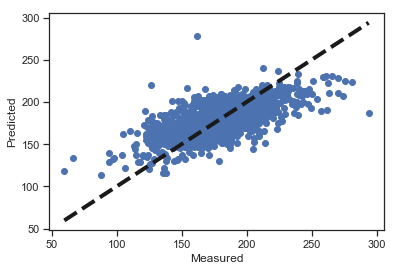

In [79]:
fig,ax = plt.subplots()
ax.scatter(y_test, predictions)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

- For the lower values on the X-axis and  higher values on the X-axis the points are not near the regression line.
- Plots shows there is varience in between y_test and Predictions. 

### Is the model good enough?

In [80]:
# Lower the RSME better the model
from sklearn.metrics import accuracy_score,mean_squared_error
crossVal_Model1=np.sqrt(mean_squared_error(y_test,predictions))
crossVal_Model1

19.911294388050845

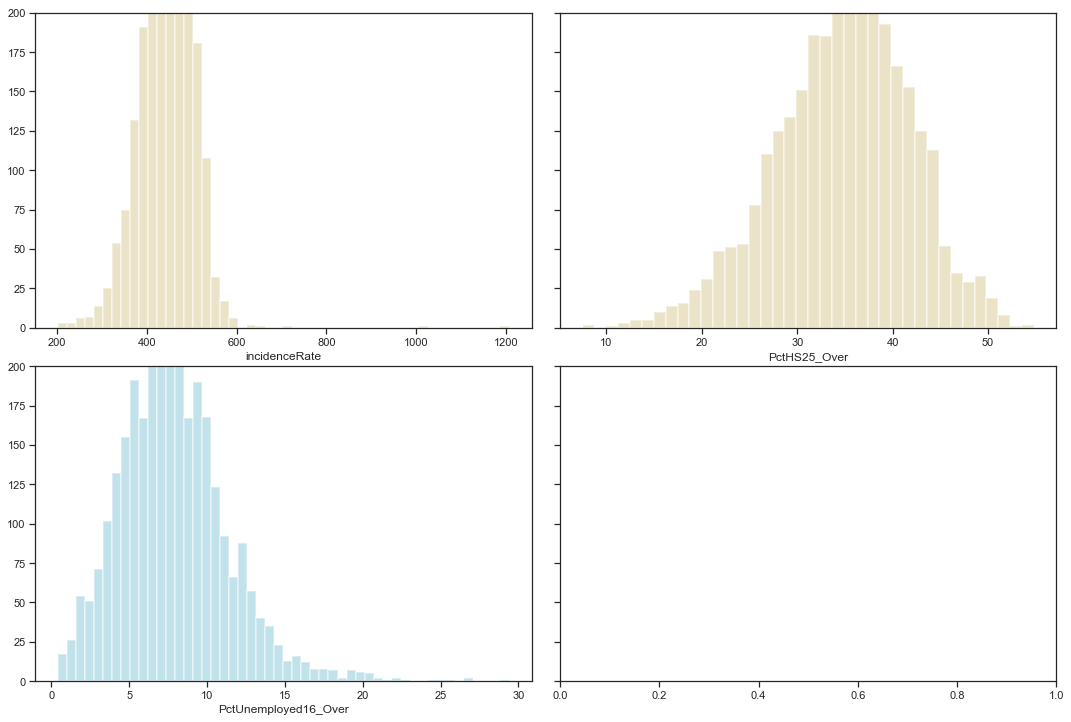

In [81]:
import seaborn as sns
colors = np.array('b g r c m y'.split()) #Different colors for plotting

fig,axes = plt.subplots(nrows =2,ncols=2, sharey=True,figsize = (15,10))
plt.tight_layout()
row = 0
iteration = 0
for j in range(0,len(x1.columns[:-3])):
    iteration+=1
    if(j%2==0):
        k = 0
    else:
        k = 1
    sns.distplot(x1[x1.columns[j]],kde=False,hist_kws=dict(edgecolor="w", linewidth=2),
                 color = np.random.choice(colors) ,ax=axes[row][k])
    if(iteration%2==0):
        row+=1
        plt.ylim(0,200)

All predictors are normally distributed, incidenceRate and PctUnemployed16_Over are skewed to the left.

### Are residuals normally distributed?
#### In regression analysis, the difference between the observed value of the dependent variable (i.e TARGET_deathRate) and the predicted value (predictions) is called the residual.

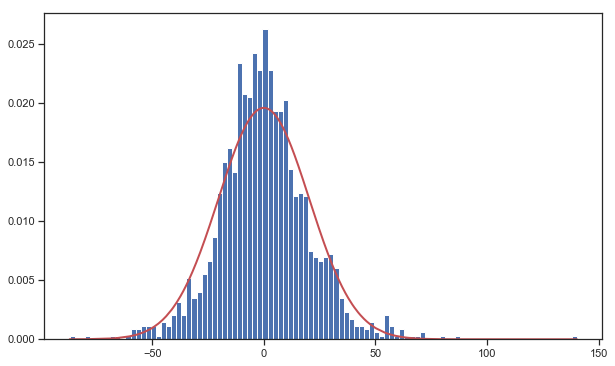

In [82]:
# histogram superimposed by normal curve
plt.figure(figsize=(10,6))
import scipy.stats as stats
mu = np.mean(results.resid)
sigma = np.std(results.resid)
pdf = stats.norm.pdf(sorted(results.resid), mu, sigma)
plt.hist(results.resid, bins=100, normed=True)
plt.plot(sorted(results.resid), pdf, color='r', linewidth=2)
plt.show()

Figure above is histogram superimposed by normal curve.
- The distribution of the residuals does not adhere perfectly to a normal distribution (skew=0, excess kurtosis=0).
- There is a small number of outliers to the left, the tails appear slightly fatter than, and the distribution has moderate kurtosis (i.e 5.81).

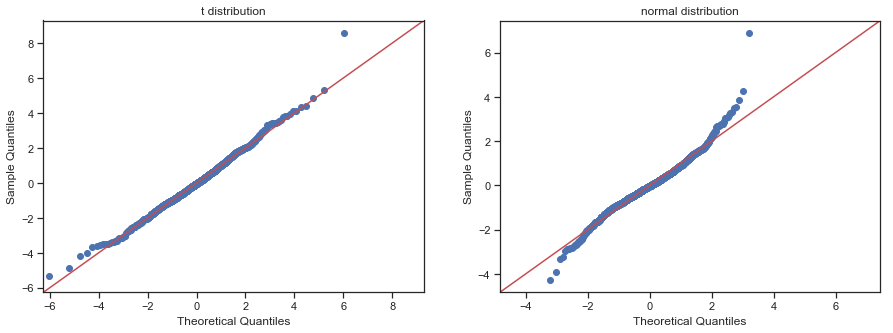

In [83]:
# QQplot
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(15,5))
sm.qqplot(results.resid, stats.t, fit=True, line='45', ax = ax1)
ax1.set_title("t distribution")
sm.qqplot(results.resid, stats.norm, fit=True, line='45', ax=ax2)
ax2.set_title("normal distribution")
plt.show()

- The qqplots confirm that the residuals adhere more closely to the t- than normal distribution (fatter tails). <br />
- A few prominent outliers are visible at the lower and upper extreme. <br />
- All-in-all, despite these imperfections, I consider the distribution of residuals to be adequate. <br />
- However, we should investigate the nature of the more extreme outliers. <br />
- We also may want to try to add additional information or to change the predictors (We will be doing it in Model 3).

### Are any model assumptions violated?

#### Homoscedasticity & Heteroscedasticity
Homoscedasticity means that the variance around the regression line is the same for all values of the predictor variable (i.e TARGET_deathRate).

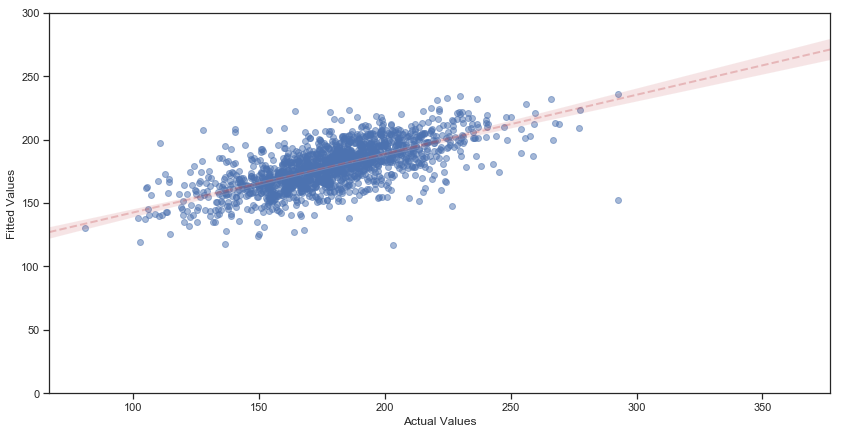

Pearson R:  (0.6811729964035649, 3.2292676064595097e-208)


In [84]:
# plot predicted vs actual
plt.figure(figsize=(14,7))
sns.regplot(y_train, results.fittedvalues, line_kws={'color':'r', 'alpha':0.3, 
                                              'linestyle':'--', 'linewidth':2}, 
            scatter_kws={'alpha':0.5})
plt.ylim(0,300)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
plt.show()
print("Pearson R: ", stats.pearsonr(results.fittedvalues, y_train))

- From the plot we can infer that fitted values and actual values are collinear.
- The fiitet values sticks to the reggression line so there is no assumption violated.
- For the lower values on the X-axis and  higher values on the X-axis the points are all very near the regression line.
- Consistent with our reported R^2 value, we now visualize the strong correlation between actual and predicted values.
- no assumption are violated

#### Plotting actual values versus residuals

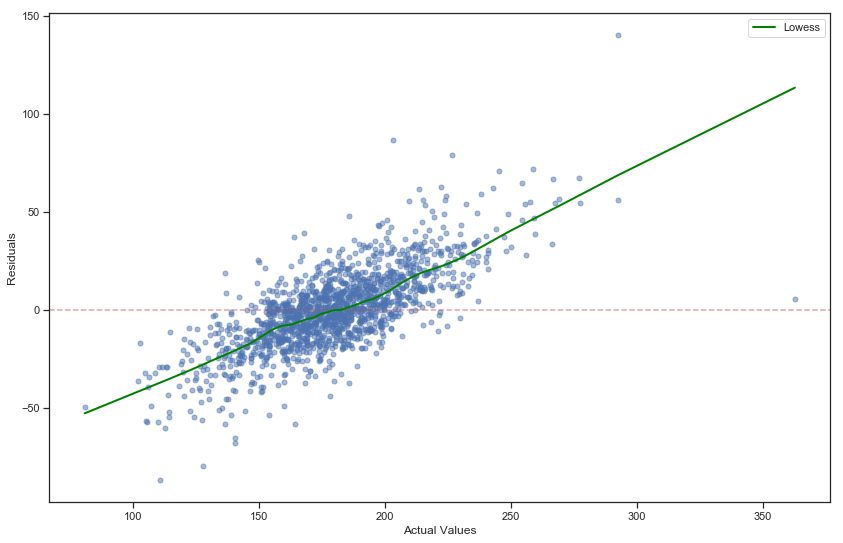

Pearson R: (0.7321224958779703, 6.768839001749626e-256)


In [85]:
from statsmodels.nonparametric.smoothers_lowess import lowess
ys = lowess(results.resid.values, y_train, frac=0.2)
ys = pd.DataFrame(ys, index=range(len(ys)), columns=['a', 'b'])
ys = ys.sort_values(by='a')

fig, ax = plt.subplots(figsize=(14,9))
plt.scatter(y_train, results.resid, alpha=0.5, s=25)
plt.axhline(y=0, color='r', linestyle="--", alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")

plt.plot(ys.a, ys.b, c='green', linewidth=2, label="Lowess")
plt.legend()
plt.show()
print("Pearson R:", stats.pearsonr(y_train, results.resid))

- A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis.
- This chart suggests values are plottet randomly and linear Model is appropriate for data.

### Cross-Validation

In [86]:
modelL1 = LinearRegression()
model = modelL1.fit(X_train,y_train)

In [87]:
predictions_linear=model.predict(X_test)
predictions_linear

array([166.02142476, 191.0936444 , 193.85471826, ..., 211.89337238,
       168.74740543, 189.6000906 ])

#### Comparing Both the output for first 5 values

In [88]:
print ('Actual Predictions :' )
print(predictions[0:5])
print ('Cross-Validation Predictions :')
print(predictions_linear[0:5])

Actual Predictions :
2802    166.021425
122     191.093644
544     193.854718
1626    165.127931
2188    131.003968
dtype: float64
Cross-Validation Predictions :
[166.02142476 191.0936444  193.85471826 165.12793086 131.00396839]


- from both the results we can infer that the our predictions are currect for the model

In [89]:
# R-Square value calculted 5 times
scores_train = cross_val_score(model, X_train,y_train, cv=5)
print(scores_train)
print("Accuracy:  %0.2f (+/- %0.2f): " % (scores_train.mean(),scores_train.std()*2))

[0.47129356 0.45507711 0.46119162 0.43056475 0.45711448]
Accuracy:  0.46 (+/- 0.03): 


In [90]:
scores_test = cross_val_score(model, X_test,y_test, cv=5)
print(scores_train )
print("Accuracy:  %0.2f (+/- %0.2f): " % (scores_train.mean(),scores_train.std()*2))

[0.47129356 0.45507711 0.46119162 0.43056475 0.45711448]
Accuracy:  0.46 (+/- 0.03): 


### Multicollinearity

AxesSubplot(0.125,0.125;0.62x0.755)


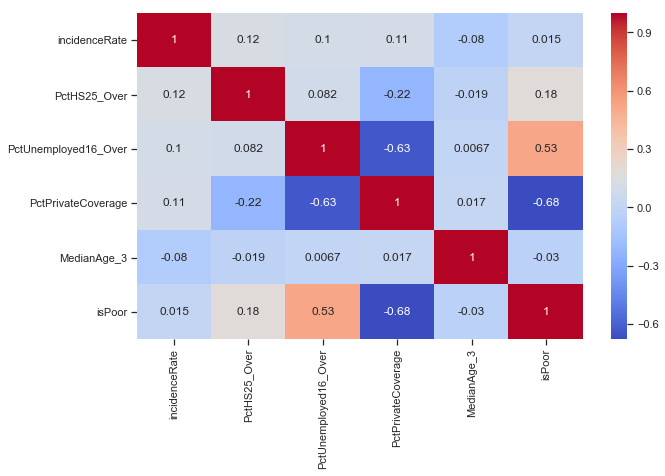

In [91]:
plt.figure(figsize=(10,6))
print(sns.heatmap(x1.corr(), annot=True,cmap='coolwarm'))
plt.show()

- Only PctPrivateCoverage has high correlation with PctUnemployed16_over and isPoor.

Let's apply variance inflation factors to assess for multicollinearity. VIFs, by performing an independent variable on the design matrix comprising all the other independent variables, allows us to assess the degree to which that independent variable is orthogonal the others. 
Larger VIFs indicate multicollinearity. 



In [92]:
pd.DataFrame([[var, variance_inflation_factor(x.values, x.columns.get_loc(var))] for var in x.columns],
                   index=range(x.shape[1]), columns=['Variable', 'VIF'])

,Variable,VIF
0,const,198.794646
1,incidenceRate,1.107825
2,PctHS25_Over,1.092472
3,PctUnemployed16_Over,1.823635
4,PctPrivateCoverage,2.536243
5,MedianAge_3,1.009472
6,isPoor,1.925240


Variance Inflation Factor (VIF) – the variance inflation factor of the linear regression is defined as VIF = 1/T. With VIF > 10 there is an indication that multicollinearity may be present; with VIF > 100 there is certainly multicollinearity among the variables. 
In the above model, Multicollinearity is present.

All the predictors have acceptable VIF.

### Linear Regression all model comparison

#### Model 3 is better model of all.
- Model 3 has better R-Square value(.53) than model 1(.33) and model 2(.42).
- Model 1 and Model 2 have some predictors with higher P-stats while Model-3 all predictors have P-value of almost 0 or (<0.05) which indicate its a better model. 
- Model 3 has very low VIF compare to other models wich indicate their is very less multi-colinearity among the predictors.
- AIC and BIC of model 3 is lessmaller compare to other model which is great indicator that model 3 is better choice.

## Logistic Regression

### Model 1

In [93]:
logReg = LogisticRegression(random_state=0)

In [94]:
ylog= df['isPoor']
# ylog= df['TARGET_deathRate']
# ylog= df['MedianAge']
# xlog = df[['TARGET_deathRate','incidenceRate','PctHS25_Over','PctEmployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctPublicCoverage','PctPublicCoverageAlone']]

xlog = df[['TARGET_deathRate','PctHS25_Over','PctPrivateCoverageAlone','PctPublicCoverage','PctPublicCoverageAlone']]

In [95]:
# Train the dataset
Xlog_train, Xlog_test, ylog_train, ylog_test = train_test_split(xlog,ylog,test_size=0.3)

In [96]:
print (Xlog_train.shape, ylog_train.shape)
print (Xlog_test.shape, ylog_test.shape)

(2132, 5) (2132,)
(915, 5) (915,)


In [97]:
# Predicting the test set results and creating confusion matrix
results_logistic = logReg.fit(Xlog_train, ylog_train)
print (results_logistic)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [98]:
ylog_pred = logReg.predict(Xlog_test)
ylog_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,

In [99]:
np.array(ylog_test)

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,

In [100]:
rmse = np.sqrt(metrics.mean_squared_error(ylog_test, ylog_pred))
rmse

0.38125475899564926

The confusion matrix is a way of tabulating the number of misclassifications, i.e., the number of predicted classes which ended up in a wrong classification bin based on the true classes.

In [101]:
# Predicting the test set results and creating confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ylog_test, ylog_pred)
print(confusion_matrix)

[[391  61]
 [ 72 391]]


From above confusion matrix we can infer that:
- Since our target variable is binary our confusion matrix has only 2 rows.
- In our 1st class or we can say column there are total 480 points out of which 419 are predicted accurately.
- in our 2nd class there are total 445 point out of which 371 measured currectly.
- An ideal classifiers with 100% accuracy would produce a pure diagonal matrix which would have all the points predicted in their correct class.
- So now, lets calculate the accuracy of our matrix.

In [102]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logReg.score(Xlog_test, ylog_test)))

Accuracy of logistic regression classifier on test set: 0.85


- Accuracy of our matrix is 0.83 which is good.

In [103]:
from sklearn.metrics import classification_report
print(classification_report(ylog_test, ylog_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       452
           1       0.87      0.84      0.85       463

   micro avg       0.85      0.85      0.85       915
   macro avg       0.85      0.85      0.85       915
weighted avg       0.85      0.85      0.85       915



In [104]:
summary_log = sm.Logit(ylog, xlog).fit()
summary_log.summary()

Optimization terminated successfully.
         Current function value: 0.371171
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 isPoor   No. Observations:                 3047
Model:                          Logit   Df Residuals:                     3042
Method:                           MLE   Df Model:                            4
Date:                Mon, 25 Mar 2019   Pseudo R-squ.:                  0.4645
Time:                        20:10:41   Log-Likelihood:                -1131.0
converged:                       True   LL-Null:                       -2111.9
                                        LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
TARGET_deathRate            0.0181      0.002      7.553      0.000       0.013       0.023
PctHS25_Over               -0.0196      0.009     -2.182      0.029      -0.037      -0.002
PctPrivateCoverageAlone    -0.1262      0.006    -19.766      0.000      -0.139      -0.114
PctPublicCoverage          -0.1211      0.014     -8.532      0.000      -0.149      -0.093
PctPublicCoverageAlone      0.4190      0.024     17.297      0.000       0.372       0.466
===========================================================================================
"""

### Calculate The probability

In [105]:
# Xlog_train, Xlog_test, ylog_train, ylog_test
logReg.predict_proba(Xlog_train)

array([[7.58562280e-04, 9.99241438e-01],
       [5.73643997e-02, 9.42635600e-01],
       [2.01731293e-01, 7.98268707e-01],
       ...,
       [7.02192678e-01, 2.97807322e-01],
       [8.41547994e-01, 1.58452006e-01],
       [6.11366337e-02, 9.38863366e-01]])

In [106]:
logReg.predict_proba(Xlog_test)

array([[0.70337126, 0.29662874],
       [0.01145162, 0.98854838],
       [0.463441  , 0.536559  ],
       ...,
       [0.15132906, 0.84867094],
       [0.86507503, 0.13492497],
       [0.05491586, 0.94508414]])

### Is Model good enough?

In [107]:
# Lower the RSME better the model
from sklearn.metrics import accuracy_score,mean_squared_error
crossVal_Model1=np.sqrt(mean_squared_error(ylog_test,ylog_pred))
crossVal_Model1

0.38125475899564926

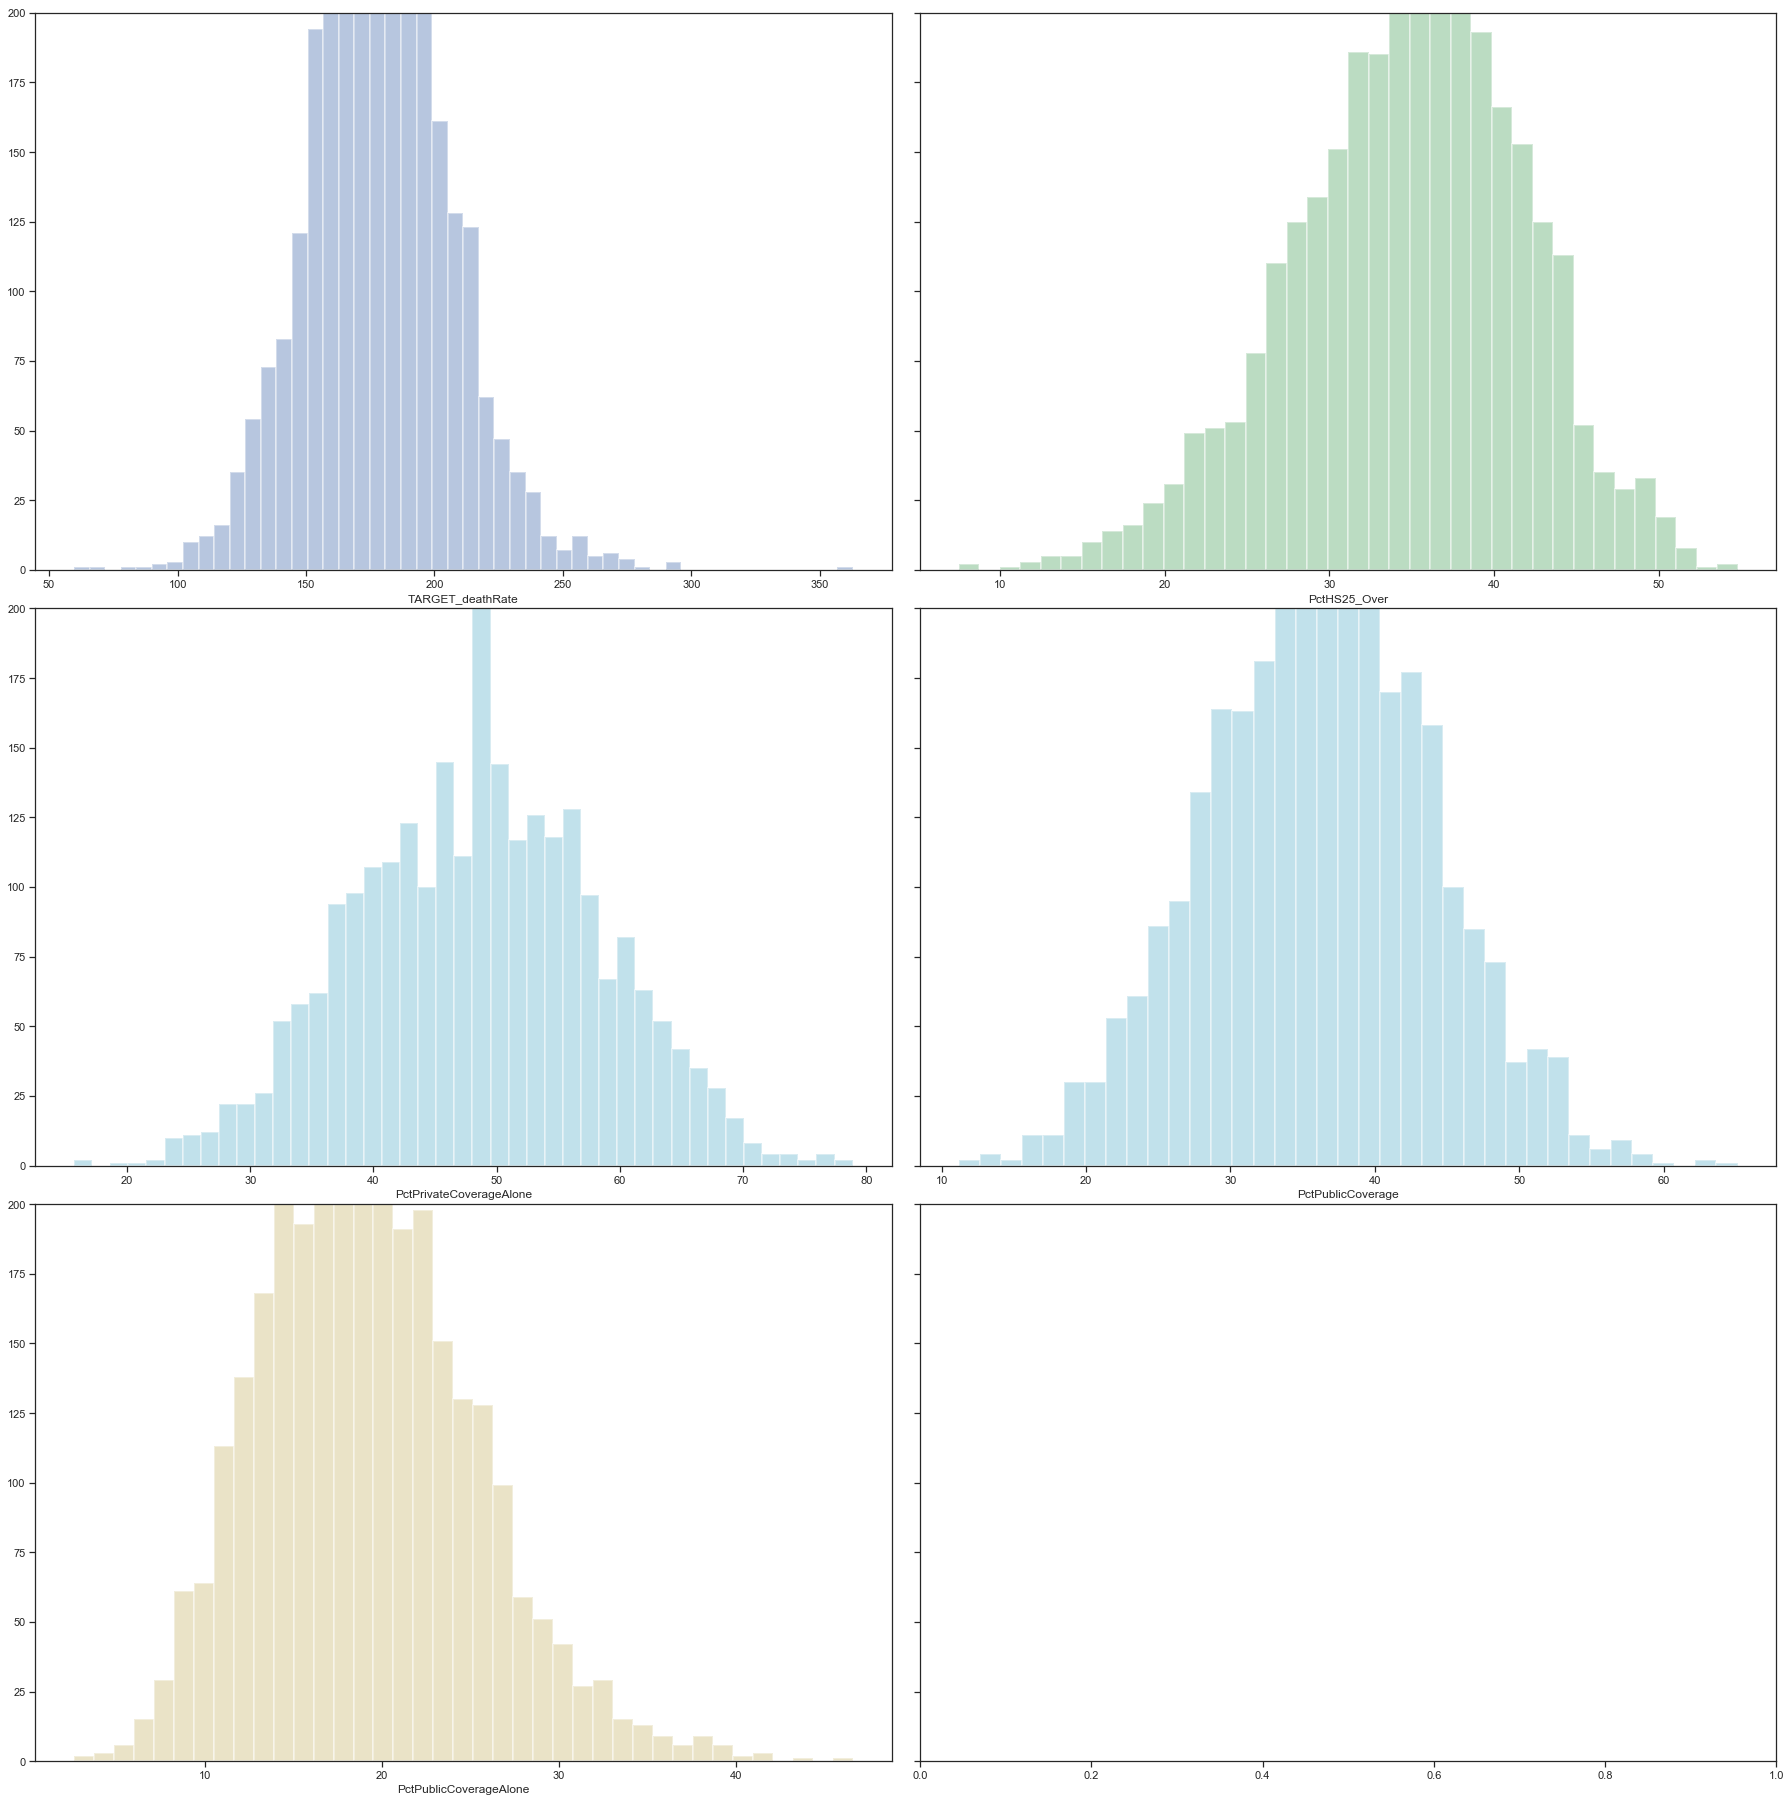

In [108]:
import seaborn as sns
colors = np.array('b g r c m y'.split()) #Different colors for plotting

fig,axes = plt.subplots(nrows =3,ncols=2, sharey=True,figsize = (25,25))
plt.tight_layout()
row = 0
iteration = 0
for j in range(0,len(xlog.columns[:])):
    iteration+=1
    if(j%2==0):
        k = 0
    else:
        k = 1
    sns.distplot(xlog[xlog.columns[j]],kde=False,hist_kws=dict(edgecolor="w", linewidth=2),
                 color = np.random.choice(colors) ,ax=axes[row][k])
    if(iteration%2==0):
        row+=1
        plt.ylim(0,200)

- all predictors are normally distributed.
- incident rate is skewed to the right.

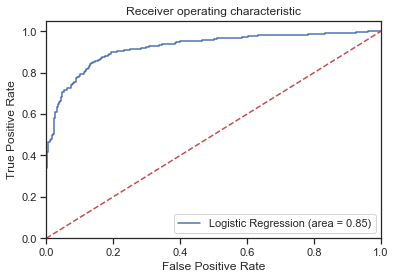

In [109]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(ylog_test, logReg.predict(Xlog_test))
fpr, tpr, thresholds = roc_curve(ylog_test, logReg.predict_proba(Xlog_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. <br />
The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner). <br />
##### From ROC curve we can safely say that our model is good; with few twicks it can be better.


### Cross Validation

#### K-Fold Cross Validation

In [110]:
X_kf=np.array(xlog)
y_kf=np.array(ylog)
# Define the split - into 2 folds 
kf=KFold(n_splits=5,shuffle=False, random_state=None) 
#Returns the number of splitting iterations in the cross-validator
kf.get_n_splits(X_kf)

5

That k-fold cross validation is a procedure used to estimate the skill of the model on new data. <br />
There are common tactics that you can use to select the value of k for your dataset. <br />

In [111]:
for train_index, test_index in kf.split(X_kf):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_kf[train_index], X_kf[test_index]
    #     y_train, y_test = y_kf[train_index], y_kf[test_index]
    

TRAIN: [ 610  611  612 ... 3044 3045 3046] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

In [112]:

scores = []
for train, test in kf.split(X_kf):
    logReg.fit(X_kf[train],y_kf[train])
    scores.append(np.sqrt(metrics.mean_squared_error(y_kf[test], logReg.predict(X_kf[test]))))
scores

[0.38623869286861,
 0.39876859635962175,
 0.390780449365,
 0.4230625693708051,
 0.3844258722192448]

In [113]:
print('Mean           : ',np.mean(scores))
print('Median         : ',np.median(scores))
print('Std. Deviation : ',np.std(scores))


Mean           :  0.39665523603665637
Median         :  0.390780449365
Std. Deviation :  0.014102399618954127


In [114]:
def show_stats(m, ncv, cv):
    print('Method: %s' %m)
    print('RMSE on no CV training: %.3f' %ncv)
    print('RMSE on 5-fold CV: %.3f' %cv)

In [115]:
show_stats('Simple Linear Regression',rmse ,np.mean(scores))

Method: Simple Linear Regression
RMSE on no CV training: 0.381
RMSE on 5-fold CV: 0.397


In [116]:
# R-Square value calculted 5 times
scores_train = cross_val_score(logReg, Xlog_train,ylog_train, cv=5)
print(scores_train)
print("Accuracy:  %0.2f (+/- %0.2f): " % (scores_train.mean(),scores_train.std()*2))

[0.82669789 0.83372365 0.83802817 0.84037559 0.84507042]
Accuracy:  0.84 (+/- 0.01): 


In [117]:
scores_test = cross_val_score(logReg, Xlog_test,ylog_test, cv=5)
print(scores_test)
print("Accuracy:  %0.2f (+/- %0.2f): " % (scores_test.mean(),scores_test.std()*2))

[0.86956522 0.81521739 0.83606557 0.86263736 0.85164835]
Accuracy:  0.85 (+/- 0.04): 


From our cross validation we can infer that :
- Test dataset and train dataset have very close scores
- our model is performing well for fitted test and train data
- Accuracy of both training and testing dataset is in 0.02 of each other which is pretty good.

### Multicollinearity

AxesSubplot(0.125,0.125;0.62x0.755)


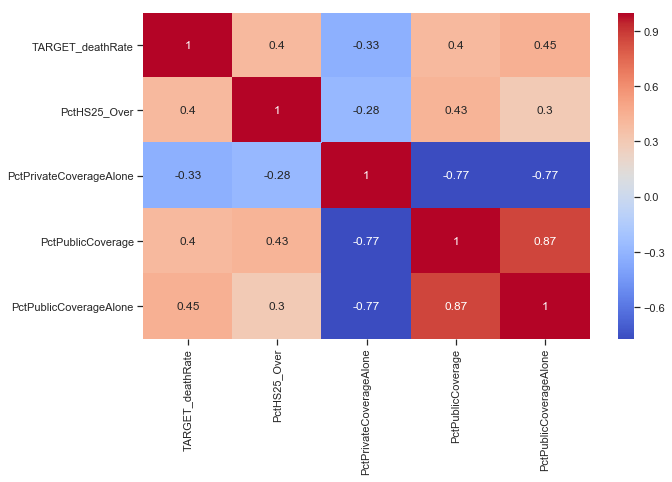

In [118]:
plt.figure(figsize=(10,6))
print(sns.heatmap(xlog.corr(), annot=True,cmap='coolwarm'))
plt.show()

- From heatmap we can infer that; PctPrivatecoverage have very high correlation with other predictors.
- In our next model we will be removing PctPrivatecoverage and try to add more predictors for better accuracy of model.

### Model 2

In [119]:
logReg = LogisticRegression(random_state=0)

In [120]:
ylog= df['isPoor']
xlog = df[['TARGET_deathRate','incidenceRate','PctHS25_Over','PctEmployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctPublicCoverage','PctPublicCoverageAlone']]

In [121]:
# Train the dataset
Xlog_train, Xlog_test, ylog_train, ylog_test = train_test_split(xlog,ylog,test_size=0.2)

In [122]:
print (Xlog_train.shape, ylog_train.shape)
print (Xlog_test.shape, ylog_test.shape)

(2437, 8) (2437,)
(610, 8) (610,)


In [123]:
# Predicting the test set results and creating confusion matrix
results_logistic = logReg.fit(Xlog_train, ylog_train)
print (results_logistic)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [124]:
ylog_pred = logReg.predict(Xlog_test)
ylog_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [125]:
np.array(ylog_test)

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,

The confusion matrix is a way of tabulating the number of misclassifications, i.e., the number of predicted classes which ended up in a wrong classification bin based on the true classes.

In [126]:
# Predicting the test set results and creating confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ylog_test, ylog_pred)
print(confusion_matrix)

[[254  48]
 [ 47 261]]


From above confusion matrix we can infer that:
- Since our target variable is binary our confusion matrix has only 2 rows.
- In our 1st class or we can say column there are total 480 points out of which 419 are predicted accurately.
- in our 2nd class there are total 445 point out of which 371 measured currectly.
- An ideal classifiers with 100% accuracy would produce a pure diagonal matrix which would have all the points predicted in their correct class.
- So now, lets calculate the accuracy of our matrix.

In [127]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logReg.score(Xlog_test, ylog_test)))

Accuracy of logistic regression classifier on test set: 0.84


- Accuracy of 85% is pretty good.

In [128]:
from sklearn.metrics import classification_report
print(classification_report(ylog_test, ylog_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       302
           1       0.84      0.85      0.85       308

   micro avg       0.84      0.84      0.84       610
   macro avg       0.84      0.84      0.84       610
weighted avg       0.84      0.84      0.84       610



In [129]:
summary_log = sm.Logit(ylog, xlog).fit()
summary_log.summary()

Optimization terminated successfully.
         Current function value: 0.330800
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 isPoor   No. Observations:                 3047
Model:                          Logit   Df Residuals:                     3039
Method:                           MLE   Df Model:                            7
Date:                Mon, 25 Mar 2019   Pseudo R-squ.:                  0.5227
Time:                        20:10:42   Log-Likelihood:                -1007.9
converged:                       True   LL-Null:                       -2111.9
                                        LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
TARGET_deathRate            0.0225      0.003      7.786      0.000       0.017       0.028
incidenceRate               0.0016      0.001      1.231      0.218      -0.001       0.004
PctHS25_Over               -0.0252      0.010     -2.642      0.008      -0.044      -0.006
PctEmployed16_Over         -0.1290      0.011    -11.444      0.000      -0.151      -0.107
PctPrivateCoverage         -0.0752      0.020     -3.729      0.000      -0.115      -0.036
PctPrivateCoverageAlone     0.0635      0.021      3.088      0.002       0.023       0.104
PctPublicCoverage          -0.0864      0.023     -3.837      0.000      -0.131      -0.042
PctPublicCoverageAlone      0.4213      0.037     11.441      0.000       0.349       0.494
===========================================================================================
"""

### Calculate The probability

In [130]:
logReg.predict_proba(Xlog_test)

array([[9.90049420e-01, 9.95057962e-03],
       [1.29322827e-01, 8.70677173e-01],
       [9.99095571e-01, 9.04428890e-04],
       ...,
       [4.34628868e-01, 5.65371132e-01],
       [6.94416052e-01, 3.05583948e-01],
       [9.94683102e-01, 5.31689780e-03]])

In [131]:
logReg.predict_proba(Xlog_train)

array([[9.92812305e-01, 7.18769465e-03],
       [7.49504575e-01, 2.50495425e-01],
       [6.32356714e-01, 3.67643286e-01],
       ...,
       [7.35363437e-04, 9.99264637e-01],
       [7.96723069e-01, 2.03276931e-01],
       [7.21799932e-02, 9.27820007e-01]])

### Is Model good enough?

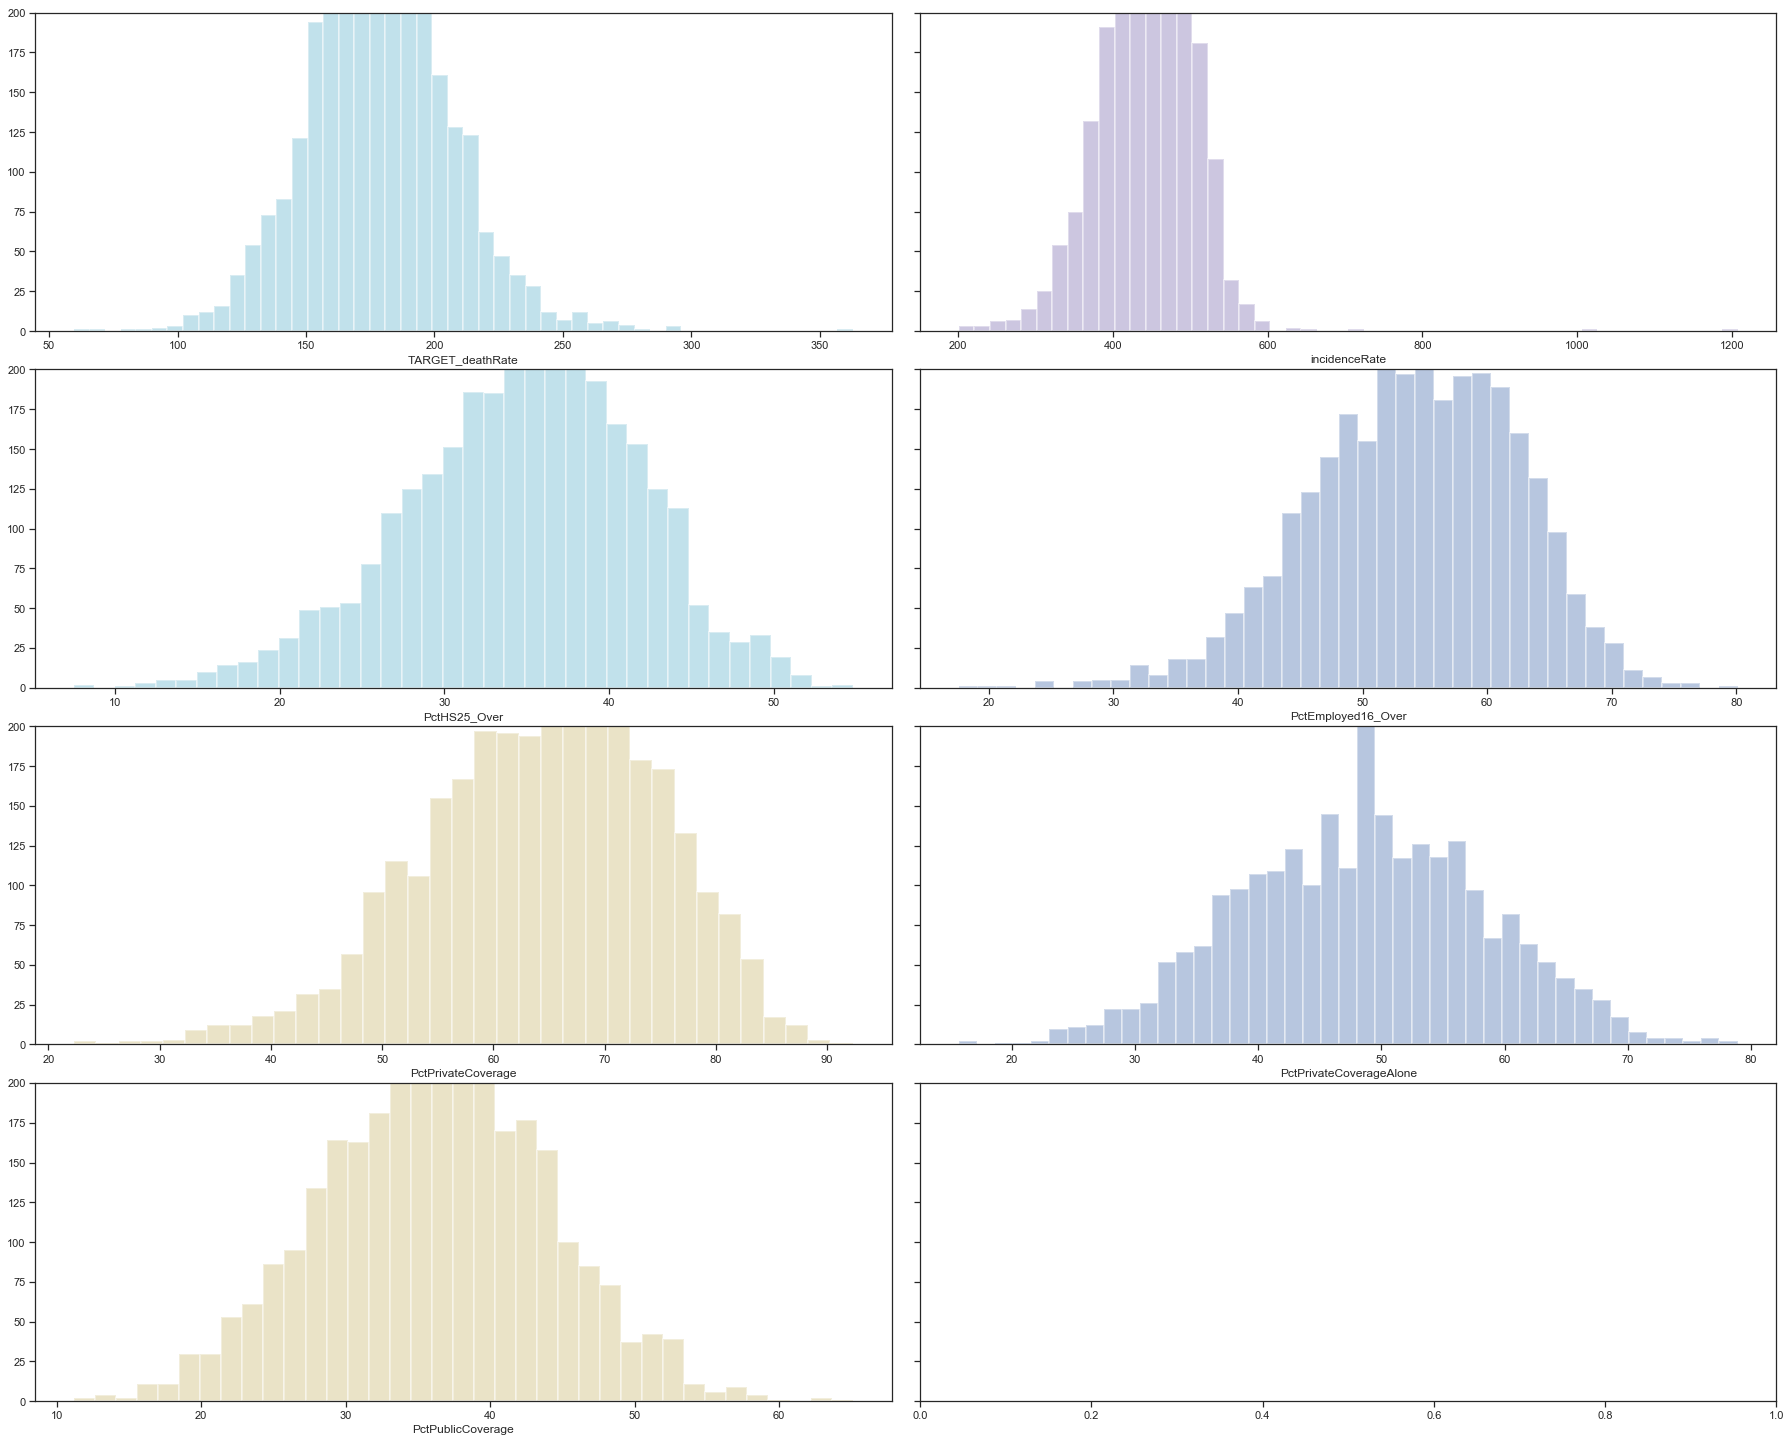

In [132]:
import seaborn as sns
colors = np.array('b g r c m y'.split()) #Different colors for plotting

fig,axes = plt.subplots(nrows =4,ncols=2, sharey=True,figsize = (25,20))
plt.tight_layout()
row = 0
iteration = 0
for j in range(0,len(xlog.columns[:-1])):
    iteration+=1
    if(j%2==0):
        k = 0
    else:
        k = 1
    sns.distplot(xlog[xlog.columns[j]],kde=False,hist_kws=dict(edgecolor="w", linewidth=2),
                 color = np.random.choice(colors) ,ax=axes[row][k])
    if(iteration%2==0):
        row+=1
        plt.ylim(0,200)

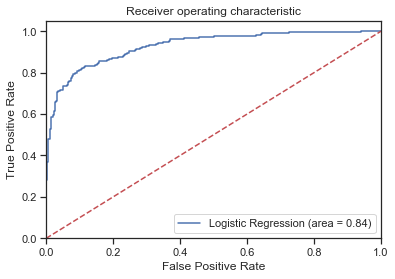

In [133]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(ylog_test, logReg.predict(Xlog_test))
fpr, tpr, thresholds = roc_curve(ylog_test, logReg.predict_proba(Xlog_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

### Cross Validation

In [134]:
# R-Square value calculted 5 times
scores_train = cross_val_score(logReg, Xlog_train,ylog_train, cv=5)
print(scores_train)
print("Accuracy:  %0.2f (+/- %0.2f): " % (scores_train.mean(),scores_train.std()*2))

[0.87704918 0.86270492 0.84599589 0.85215606 0.88090349]
Accuracy:  0.86 (+/- 0.03): 


In [135]:
scores_test = cross_val_score(logReg, Xlog_test,ylog_test, cv=5)
print(scores_test)
print("Accuracy:  %0.2f (+/- %0.2f): " % (scores_test.mean(),scores_test.std()*2))

[0.91056911 0.85365854 0.80327869 0.88429752 0.79338843]
Accuracy:  0.85 (+/- 0.09): 


From our cross validation we can infer that :
- Test dataset and train dataset have very close scores
- our model is performing well for fitted test and train data
- Accuracy of both training and testing dataset is in 0.01 of each other which is pretty good.

### Multicollinearity

AxesSubplot(0.125,0.125;0.62x0.755)


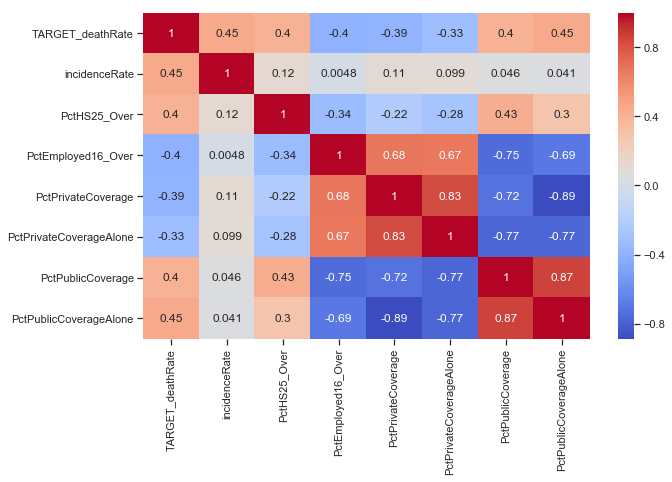

In [136]:
plt.figure(figsize=(10,6))
print(sns.heatmap(xlog.corr(), annot=True,cmap='coolwarm'))
plt.show()

### Model 3

In [137]:
logReg = LogisticRegression(random_state=0)

In [138]:
ylog= df['isPoor']
xlog = df[['TARGET_deathRate','medIncome','povertyPercent','PctHS25_Over','PctEmployed16_Over','PctUnemployed16_Over','PctPrivateCoverage','PctPublicCoverage','PctPublicCoverageAlone']]
# xlog = df[['TARGET_deathRate','MedianAge','incidenceRate','PctHS25_Over','PctEmployed16_Over','povertyPercent','PctUnemployed16_Over','PctPrivateCoverage']]

In [139]:
# Train the dataset
Xlog_train, Xlog_test, ylog_train, ylog_test = train_test_split(xlog,ylog,test_size=0.2)

In [140]:
print (Xlog_train.shape, ylog_train.shape)
print (Xlog_test.shape, ylog_test.shape)

(2437, 9) (2437,)
(610, 9) (610,)


In [141]:
# Predicting the test set results and creating confusion matrix
results_logistic = logReg.fit(Xlog_train, ylog_train)
print (results_logistic)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [142]:
ylog_pred = logReg.predict(Xlog_test)
ylog_pred

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,

In [143]:
np.array(ylog_test)

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,

The confusion matrix is a way of tabulating the number of misclassifications, i.e., the number of predicted classes which ended up in a wrong classification bin based on the true classes.

In [144]:
# Predicting the test set results and creating confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ylog_test, ylog_pred)
print(confusion_matrix)

[[307  10]
 [  8 285]]


From above confusion matrix we can infer that:
- Since our target variable is binary our confusion matrix has only 2 rows.
- In our 1st class or we can say column there are total 323 points out of which 313 are predicted accurately.
- in our 2nd class there are total 287 point out of which 269 measured currectly.
- An ideal classifiers with 100% accuracy would produce a pure diagonal matrix which would have all the points predicted in their correct class.
- So now, lets calculate the accuracy of our matrix.

In [145]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logReg.score(Xlog_test, ylog_test)))

Accuracy of logistic regression classifier on test set: 0.97


In [146]:
from sklearn.metrics import classification_report
print(classification_report(ylog_test, ylog_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       317
           1       0.97      0.97      0.97       293

   micro avg       0.97      0.97      0.97       610
   macro avg       0.97      0.97      0.97       610
weighted avg       0.97      0.97      0.97       610



In [147]:
summary_log = sm.Logit(ylog, xlog).fit()
summary_log.summary()

Optimization terminated successfully.
         Current function value: 0.051675
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 isPoor   No. Observations:                 3047
Model:                          Logit   Df Residuals:                     3038
Method:                           MLE   Df Model:                            8
Date:                Mon, 25 Mar 2019   Pseudo R-squ.:                  0.9254
Time:                        20:10:44   Log-Likelihood:                -157.45
converged:                       True   LL-Null:                       -2111.9
                                        LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
TARGET_deathRate          -0.0165      0.007     -2.321      0.020      -0.030      -0.003
medIncome                 -0.0003   4.39e-05     -7.104      0.000      -0.000      -0.000
povertyPercent             3.3749      0.281     11.992      0.000       2.823       3.927
PctHS25_Over              -0.0697      0.025     -2.797      0.005      -0.119      -0.021
PctEmployed16_Over        -0.2672      0.038     -7.121      0.000      -0.341      -0.194
PctUnemployed16_Over      -0.2122      0.075     -2.832      0.005      -0.359      -0.065
PctPrivateCoverage        -0.1360      0.039     -3.491      0.000      -0.212      -0.060
PctPublicCoverage         -0.3804      0.056     -6.834      0.000      -0.490      -0.271
PctPublicCoverageAlone     0.2402      0.094      2.561      0.010       0.056       0.424
==========================================================================================

Possibly complete quasi-separation: A fraction 0.72 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Calculate The probability

In [148]:
logReg.predict_proba(Xlog_test)

array([[4.40037403e-03, 9.95599626e-01],
       [9.99983875e-01, 1.61251761e-05],
       [9.99998151e-01, 1.84896501e-06],
       ...,
       [1.90989510e-01, 8.09010490e-01],
       [1.73600199e-04, 9.99826400e-01],
       [9.99999997e-01, 3.49876900e-09]])

In [149]:
logReg.predict_proba(Xlog_train)

array([[9.99800876e-01, 1.99123573e-04],
       [9.70302683e-06, 9.99990297e-01],
       [9.97843372e-01, 2.15662818e-03],
       ...,
       [4.84875176e-01, 5.15124824e-01],
       [9.99980504e-01, 1.94961035e-05],
       [1.48061599e-07, 9.99999852e-01]])

### Is Model good enough?

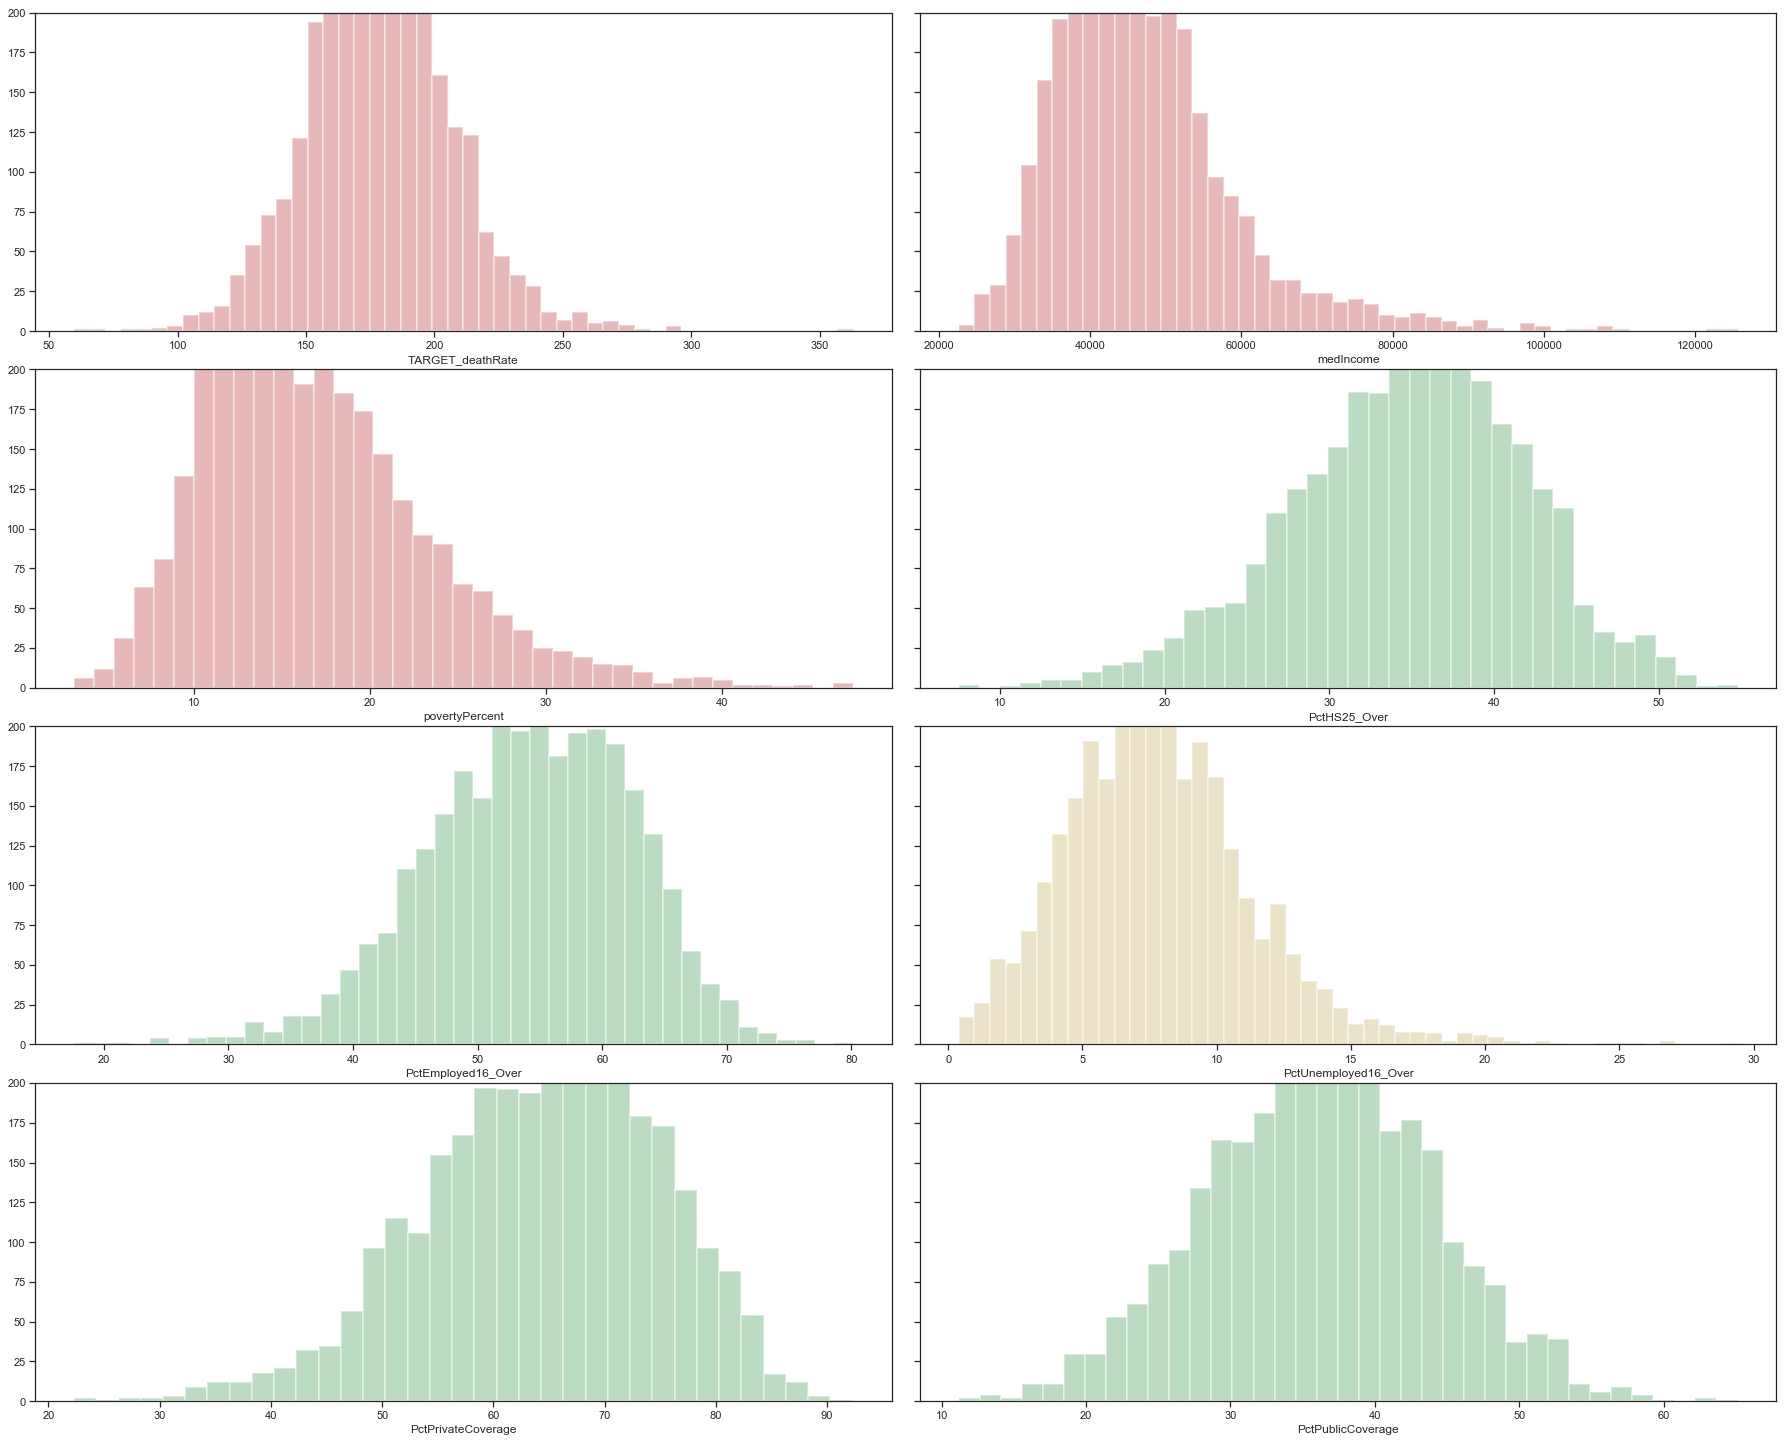

In [150]:
import seaborn as sns
colors = np.array('b g r c m y'.split()) #Different colors for plotting

fig,axes = plt.subplots(nrows =4,ncols=2, sharey=True,figsize = (25,20))
plt.tight_layout()
row = 0
iteration = 0
for j in range(0,len(xlog.columns[:-1])):
    iteration+=1
    if(j%2==0):
        k = 0
    else:
        k = 1
    sns.distplot(xlog[xlog.columns[j]],kde=False,hist_kws=dict(edgecolor="w", linewidth=2),
                 color = np.random.choice(colors) ,ax=axes[row][k])
    if(iteration%2==0):
        row+=1
        plt.ylim(0,200)

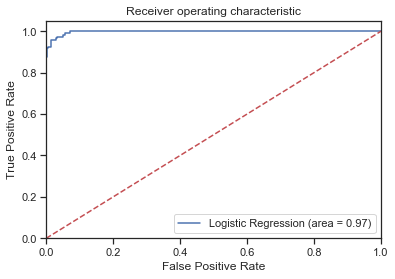

In [151]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(ylog_test, logReg.predict(Xlog_test))
fpr, tpr, thresholds = roc_curve(ylog_test, logReg.predict_proba(Xlog_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

### Cross Validation

In [152]:
# R-Square value calculted 5 times
scores_train = cross_val_score(logReg, Xlog_train,ylog_train, cv=5)
print(scores_train)
print("Accuracy:  %0.2f (+/- %0.2f): " % (scores_train.mean(),scores_train.std()*2))

[0.96721311 0.97336066 0.98562628 0.94455852 0.98151951]
Accuracy:  0.97 (+/- 0.03): 


In [153]:
scores_test = cross_val_score(logReg, Xlog_test,ylog_test, cv=5)
print(scores_test)
print("Accuracy:  %0.2f (+/- %0.2f): " % (scores_test.mean(),scores_test.std()*2))

[0.94308943 0.92682927 0.97540984 0.98347107 0.97520661]
Accuracy:  0.96 (+/- 0.04): 


From our cross validation we can infer that :
- Test dataset and train dataset have very close scores
- our model is performing well for fitted test and train data
- Accuracy of both training and testing dataset is in 0.01 of each other which is pretty good.

### Conclusion for Logistic Regression Model
#### In all Models the Model 3 gives better precision.
- Model 3 give precison of 97% while model 1 and model 2 have precison of 81% and 83% respectively.
- Roc curve for model 3 is very close to the top-left corner comapre to other two models which is good indication of accuracy.
- model 3 has very high F1-Score compar to other models.
- confusion metrics for model 3 is fairly accurate than other models.

### Multicollinearity

AxesSubplot(0.125,0.125;0.62x0.755)


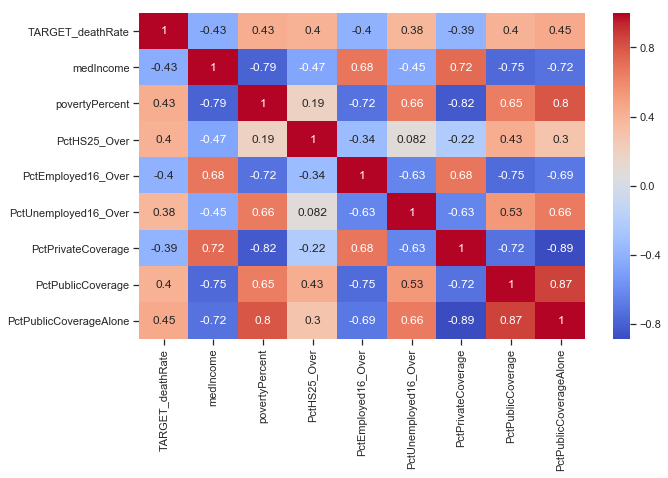

In [154]:
plt.figure(figsize=(10,6))
print(sns.heatmap(xlog.corr(), annot=True,cmap='coolwarm'))
plt.show()

## Multi-colinearity and Step-wise regression

### Step-wise regression using Backword Selection method.

- In Backword Selection method; we are going to check which predictors performs well and we will be removing predictots which have high P-stats and comparing the output. 
- Here our Traget variable is 'isPoor'

### Step - 1

In [155]:
ystep= df['isPoor']
xstep = df[['TARGET_deathRate','incidenceRate','medIncome','PctHS25_Over','PctEmployed16_Over','povertyPercent','PctBachDeg25_Over','PctUnemployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctPublicCoverage','PctPublicCoverageAlone','MedianAge_1','MedianAge_2','MedianAge_3']]

In [156]:
regressor_OLS = sm.OLS(endog = ystep, exog = xstep).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 isPoor   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     346.7
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        20:10:46   Log-Likelihood:                -755.06
No. Observations:                3047   AIC:                             1540.
Df Residuals:                    3032   BIC:                             1630.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
TARGET_deathRate            0.0009      0.000      3.199      0.001       0.000       0.001
incidenceRate            9.426e-06      0.000      0.074      0.941      -0.000       0.000
medIncome               -5.735e-06   1.08e-06     -5.298      0.000   -7.86e-06   -3.61e-06
PctHS25_Over               -0.0029      0.001     -2.049      0.041      -0.006      -0.000
PctEmployed16_Over         -0.0067      0.001     -5.021      0.000      -0.009      -0.004
povertyPercent              0.0409      0.002     17.916      0.000       0.036       0.045
PctBachDeg25_Over          -0.0002      0.002     -0.105      0.916      -0.005       0.004
PctUnemployed16_Over       -0.0013      0.002     -0.503      0.615      -0.006       0.004
PctPrivateCoverage         -0.0030      0.002     -1.753      0.080      -0.006       0.000
PctPrivateCoverageAlone     0.0002      0.001      0.125      0.900      -0.002       0.003
PctPublicCoverage          -0.0072      0.003     -2.773      0.006      -0.012      -0.002
PctPublicCoverageAlone      0.0080      0.004      2.171      0.030       0.001       0.015
MedianAge_1                 0.6709      0.178      3.767      0.000       0.322       1.020
MedianAge_2                 0.6856      0.180      3.814      0.000       0.333       1.038
MedianAge_3                 0.6829      0.181      3.774      0.000       0.328       1.038
==============================================================================
Omnibus:                      230.281   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.059
Skew:                           0.019   Prob(JB):                     1.85e-17
Kurtosis:                       2.222   Cond. No.                     2.67e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From STep - 1 we can infer that :
- R-squared value of regression is 0.616 which is good.
- Predictor like incidenceRate, PctBachDeg25_Over, PctUnemployed16_Over, PctPrivateCoverageAlone have P-Stats above 0.05.
- We will be removing above predictors in next step and check the value of R-squared. 

### Step - 2

In [157]:
# Removing all column with p-Stats above 0.05
xstep2 = df[['TARGET_deathRate','medIncome','PctHS25_Over','PctEmployed16_Over','povertyPercent','PctPrivateCoverage','PctPublicCoverage','MedianAge_1','MedianAge_2','MedianAge_3']]

In [158]:
regressor_OLS = sm.OLS(endog = ystep, exog = xstep2).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 isPoor   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     538.7
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        20:10:47   Log-Likelihood:                -757.71
No. Observations:                3047   AIC:                             1535.
Df Residuals:                    3037   BIC:                             1596.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
TARGET_deathRate       0.0010      0.000      3.998      0.000       0.000       0.001
medIncome          -5.056e-06   9.85e-07     -5.135      0.000   -6.99e-06   -3.13e-06
PctHS25_Over          -0.0026      0.001     -2.483      0.013      -0.005      -0.001
PctEmployed16_Over    -0.0058      0.001     -4.769      0.000      -0.008      -0.003
povertyPercent         0.0424      0.002     20.109      0.000       0.038       0.047
PctPrivateCoverage    -0.0047      0.001     -4.458      0.000      -0.007      -0.003
PctPublicCoverage     -0.0030      0.002     -1.981      0.048      -0.006   -3.13e-05
MedianAge_1            0.6576      0.176      3.741      0.000       0.313       1.002
MedianAge_2            0.6643      0.177      3.744      0.000       0.316       1.012
MedianAge_3            0.6419      0.178      3.612      0.000       0.293       0.990
==============================================================================
Omnibus:                      230.067   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.053
Skew:                           0.021   Prob(JB):                     1.85e-17
Kurtosis:                       2.222   Cond. No.                     2.64e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From STep - 1 we can infer that :
- R-squared value of regression is 0.615 which is good and unchanged from Step - 1. 
- Predictor like medIncome,MedianAge_1,MedianAge_2,MedianAge_3 have high standard error.
- We will be removing above predictors in next step and check the value of R-squared. 

### Step - 3

In [159]:
# Removing all column with p-Stats above 0.05
xstep3 = df[['TARGET_deathRate','medIncome','PctHS25_Over','PctEmployed16_Over','povertyPercent','PctPrivateCoverage','PctPublicCoverage']]

In [160]:
regressor_OLS = sm.OLS(endog = ystep, exog = xstep3).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 isPoor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     1788.
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        20:10:47   Log-Likelihood:                -764.89
No. Observations:                3047   AIC:                             1544.
Df Residuals:                    3040   BIC:                             1586.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
TARGET_deathRate       0.0011      0.000      4.578      0.000       0.001       0.002
medIncome          -3.039e-06   8.17e-07     -3.719      0.000   -4.64e-06   -1.44e-06
PctHS25_Over          -0.0014      0.001     -1.382      0.167      -0.003       0.001
PctEmployed16_Over    -0.0030      0.001     -3.184      0.001      -0.005      -0.001
povertyPercent         0.0478      0.001     34.534      0.000       0.045       0.051
PctPrivateCoverage    -0.0026      0.001     -3.041      0.002      -0.004      -0.001
PctPublicCoverage      0.0004      0.001      0.421      0.674      -0.002       0.002
==============================================================================
Omnibus:                      155.409   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.414
Skew:                           0.003   Prob(JB):                     4.61e-14
Kurtosis:                       2.305   Cond. No.                     1.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### From above Backword Stepwise regression we can say that :
- The best predictors for target variable 'isPoor' are 'TARGET_deathRate','medIncome','PctHS25_Over','PctEmployed16_Over','povertyPercent','PctPrivateCoverage','PctPublicCoverage' 
- The P-Stats and Standard Error are very minimal which is good sign of a model.
- The R-Square value of model is .80 is really good.

### Step-wise regression using Forward Selection method.

- We are also going to perform Forward Stepwise regression against the target variable 'TARGET_deathRate'.

In [161]:
def forward_selected(data, response):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,' + '.join(selected + [candidate]))
            score = ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        print("{:.2f}".format(best_new_score),'            | ', best_candidate)
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = ols(formula, data).fit()
    
    return model

In [162]:
data = df[['incidenceRate','medIncome','povertyPercent','PctHS25_Over','PctEmployed16_Over','PctUnemployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone','TARGET_deathRate','PctPublicCoverage','PctPublicCoverageAlone']]
print('The Best predictors for our model:')
print('-------------------------------------------')
print('R-Squared Value  |  Predictor Name ')
print('-------------------------------------------')
model = forward_selected(data, 'TARGET_deathRate')
print('-------------------------------------------')
print()
print ('R-Squared Value: ')
print (round(model.rsquared_adj,2))


The Best predictors for our model:
-------------------------------------------
R-Squared Value  |  Predictor Name 
-------------------------------------------
0.20             |  incidenceRate
0.39             |  PctPrivateCoverage
0.46             |  PctHS25_Over
0.47             |  povertyPercent
0.47             |  PctUnemployed16_Over
0.48             |  PctPrivateCoverageAlone
0.48             |  PctEmployed16_Over
0.48             |  PctPublicCoverage
0.48             |  PctPublicCoverageAlone
0.48             |  medIncome
-------------------------------------------

R-Squared Value: 
0.48


##### From above Forward Stepwise regression we can say that :
- The best predictors for target variable 'TARGET_deathRate' are [incidenceRate,PctPrivateCoverage,PctHS25_Over,povertyPercent,PctUnemployed16_Over,
PctPrivateCoverageAlone,PctEmployed16_Over,PctPublicCoverage,PctPublicCoverageAlone,medIncome]

- The calculated R-Squared Value(0.48) is good.


## Regularization 

- Regularization is a method for "constraining" or "regularizing" the size of the coefficients, thus "shrinking" them towards zero.
- It reduces model variance which minimizes overfitting.

For a regularized linear regression model, we minimize the sum of RSS and a "penalty term" that penalizes coefficient size.

### Ridge Regression

In [163]:
df_norm=df

In [164]:
df_norm=df_norm.drop('binnedInc', axis=1)
df_norm=df_norm.drop('Geography', axis=1)

In [165]:
# Ridge regression with an alpha of 0.5
y_norm=df_norm['TARGET_deathRate']
# x_norm = df_norm[['TARGET_deathRate','incidenceRate','medIncome','povertyPercent','PctHS25_Over','PctEmployed16_Over','PctUnemployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctPublicCoverage','PctPublicCoverageAlone']]
x_norm = df_norm[['incidenceRate','PctHS25_Over','PctUnemployed16_Over','PctPrivateCoverage','MedianAge_3','isPoor']]

X_train, X_test, y_train, y_test = train_test_split(x_norm,y_norm,test_size=0.2)
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Text(0.5, 1.0, 'Ridge Regression - TARGET_deathRate vs Predicted TARGET_deathRate: $Y_i$ vs $\\hat{y}_i$')

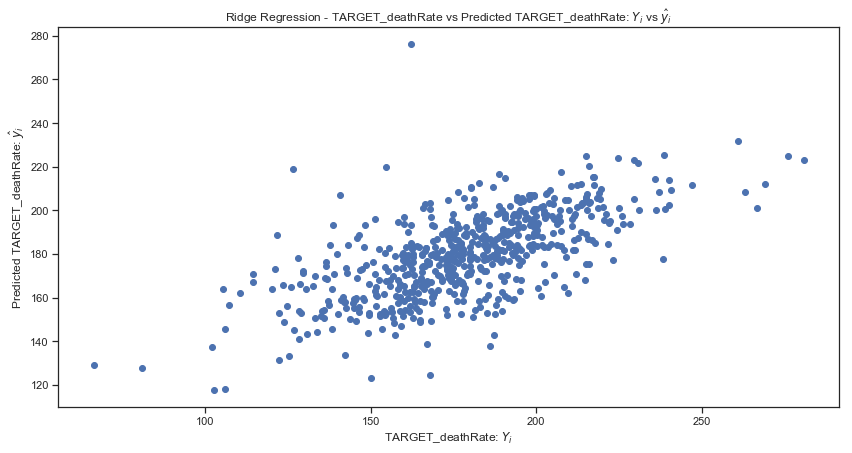

In [166]:
y_pred = ridge.predict(X_test)
plt.figure(figsize=(14,7))
plt.scatter(y_test, y_pred)
plt.xlabel("TARGET_deathRate: $Y_i$")
plt.ylabel("Predicted TARGET_deathRate: $\hat{y}_i$")
plt.title("Ridge Regression - TARGET_deathRate vs Predicted TARGET_deathRate: $Y_i$ vs $\hat{y}_i$")

In [167]:
rmse_norm = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse_norm

21.39268600066877

In [168]:
linreg = LinearRegression()
# Train the model using the training sets
linreg.fit(x_norm,y_norm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [169]:
X_kf=np.array(x_norm)
y_kf=np.array(y_norm)
# Define the split - into 2 folds 
kf=KFold(n_splits=5,shuffle=False, random_state=None) 
#Returns the number of splitting iterations in the cross-validator
kf.get_n_splits(X_kf)

5

In [170]:
for train_index, test_index in kf.split(X_kf):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_kf[train_index], X_kf[test_index]

TRAIN: [ 610  611  612 ... 3044 3045 3046] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

In [171]:
scores = []
for train, test in kf.split(X_kf):
    linreg.fit(X_kf[train],y_kf[train])
    scores.append(np.sqrt(metrics.mean_squared_error(y_kf[test], linreg.predict(X_kf[test]))))
# scores
np.around(scores, decimals=2)

array([21.05, 19.96, 20.24, 19.69, 20.87])

In [172]:
print('Mean           : ',round(np.mean(scores),2))
print('Median         : ',round(np.median(scores),2))
print('Std. Deviation : ',round(np.std(scores),2))

Mean           :  20.36
Median         :  20.24
Std. Deviation :  0.52


In [173]:
def show_stats(m, ncv, cv):
    print('Method: %s' %m)
    print('RMSE on no CV training: %.3f' %ncv)
    print('RMSE on 5-fold CV: %.3f' %cv)

In [174]:
show_stats('Simple Linear Regression',rmse_norm ,np.mean(scores))

Method: Simple Linear Regression
RMSE on no CV training: 21.393
RMSE on 5-fold CV: 20.362


In [175]:
print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_cv\n')
alpha = np.linspace(.01,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(fit_intercept=True, alpha=a)  
    # computing the RMSE on training data
    ridge.fit(X_kf,y_kf)
    y_pred = ridge.predict(X_kf)
    err = y_pred-y_kf    
    # Dot product of error vector with itself gives us the sum of squared errors
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(y_pred))

    # computing RMSE using 5-fold cross validation
    kf = KFold(len(X_kf))
    xval_err = 0
    for train, test in kf.split(X_kf):
        ridge.fit(X_kf[train], y_kf[train])
        y_pred = ridge.predict(X_kf[test])
        err = y_pred - y_kf[test]
        xval_err += np.dot(err,err)
    rmse_cv = np.sqrt(xval_err/len(X_kf))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_cv

0.010	 20.0826		 20.1498
0.418	 20.0826		 20.1497
0.826	 20.0826		 20.1497
1.234	 20.0826		 20.1497
1.642	 20.0826		 20.1497
2.050	 20.0826		 20.1496
2.458	 20.0826		 20.1496
2.866	 20.0826		 20.1496
3.274	 20.0826		 20.1495
3.682	 20.0826		 20.1495
4.090	 20.0826		 20.1495
4.498	 20.0826		 20.1495
4.906	 20.0826		 20.1495
5.313	 20.0826		 20.1494
5.721	 20.0827		 20.1494
6.129	 20.0827		 20.1494
6.537	 20.0827		 20.1494
6.945	 20.0827		 20.1494
7.353	 20.0827		 20.1493
7.761	 20.0827		 20.1493
8.169	 20.0827		 20.1493
8.577	 20.0827		 20.1493
8.985	 20.0828		 20.1493
9.393	 20.0828		 20.1493
9.801	 20.0828		 20.1493
10.209	 20.0828		 20.1493
10.617	 20.0828		 20.1492
11.025	 20.0828		 20.1492
11.433	 20.0829		 20.1492
11.841	 20.0829		 20.1492
12.249	 20.0829		 20.1492
12.657	 20.0829		 20.1492
13.065	 20.0829		 20.1492
13.473	 20.0830		 20.1492
13.881	 20.0830		 20.1492
14.289	 20.0830		 20.1492
14.697	 20.0830		 20.1492
15.104	 20.0831		 

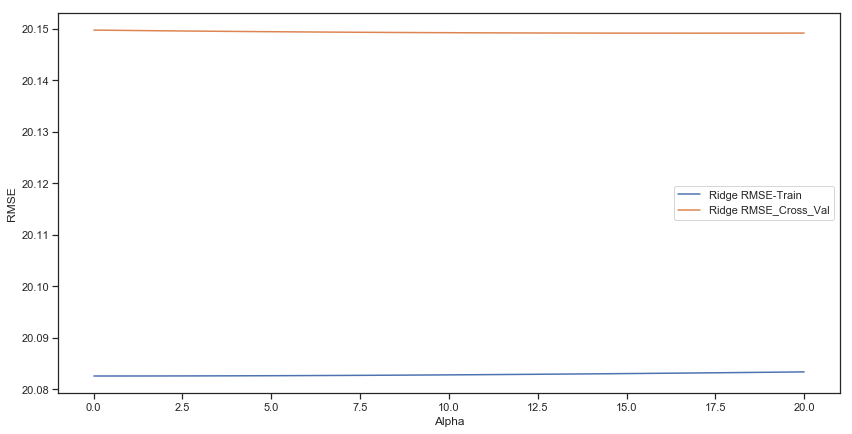

In [176]:
plt.figure(figsize=(14,7))
pl.plot(alpha, t_rmse, label='RMSE-Train')
pl.plot(alpha, cv_rmse, label='RMSE_Cross_Val')
pl.legend( ('Ridge RMSE-Train', 'Ridge RMSE_Cross_Val') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

In Ridge Regression:
The cross validation between RMSE_train and RMSE_cv shows the root mean square error for train and cross validation values  very close 

## Conclusion

We have successfully implementation various regression algorithms like linear Regression, Logistic regression, StepWise Regression and Ridge regression (i.e _L2 regularization_) to predict Cancer Mortality Rates for US Counties. <br />
Cancer Mortality Rates for US Counties is depend upon various factors like <br /> TARGET_deathRate,incidenceRate,medIncome,povertyPercent,PctHS25_Over,PctEmployed16_Over,PctUnemployed16_Over, <br /> PctPrivateCoverage,PctPrivateCoverageAlone,PctPublicCoverage,PctPublicCoverageAlone <br />
but the most prominent are : <br />
incidenceRate, PctPrivateCoverage, PctHS25_Over, povertyPercent, PctUnemployed16_Over, PctPrivateCoverageAlone, <br /> PctEmployed16_Over, PctPublicCoverage, PctPublicCoverageAlone, medIncome <br />

In linear regression The best model give the 'best fit'(R-Square) of: 0.51 while in Logistic Rgression's the best model gives accuracy of 0.97.
In our analysis the predictors we use in linear Regression and predictors suggested by forward stepwise regression are same wich suggest that the independent variable we use are very correlated.

## Contributions 

In above analysis:
- 70% of explanation, analysis and code is done by me.
- 20% of resource is from web and citations are given below.
- 10% of resource is from prof. Nik Brown notes.

## Citations

Dataset : https://data.world/nrippner/ols-regression-challenge <br />
Regression methods : https://github.com/nikbearbrown/INFO_6105/<br />
Learn ROC Curve : https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8 <br />
Dummy function : https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40 <br />
K-fold cross validation: https://towardsdatascience.com/cross-validation-70289113a072 <br />
Homoscedasticity : http://davidmlane.com/hyperstat/A121947.html <br />
Confusion Matrix : https://stackoverflow.com/questions/30746460/how-to-interpret-scikits-learn-confusion-matrix-and-classification-report <br />
Forward Stepwise : https://planspace.org/20150423-forward_selection_with_statsmodels/ <br />
Backword Elimination : https://www.kaggle.com/umeshsati54/backward-elimination <br />
Feature Scalling : http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#about-standardization <br />
Outliers : https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba <br />
Standard Error : http://changingminds.org/explanations/research/statistics/standard_error.htm


##  License

#### Copyright 2019 Kailash Nadkar


Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.